# Machine Learning for Churn Analysis Bradlees Dataset

In today’s highly competitive retail landscape, customer retention is critical for sustained profit growth. Bradlees faces a strategic choice: focus on retaining existing customers or invest in acquiring new ones. Studies consistently show that acquiring a new customer can cost four to five times more than retaining an existing one.

This is where Machine Learning (ML) plays a critical role. Rather than relying on manual analysis or general marketing strategies, ML models can analyze large volumes of customer data to predict which users are most likely to churn. By leveraging transaction history, interaction patterns, and customer demographics, ML enables the company to tailor its retention strategies and allocate resources more effectively.

In the machine learning analysis for churn prediction, we conducted three experiments: (1) Baseline Model: Using the cleaned dataset without any additional modifications; (2) Feature Engineering Experiment: Enhancing the dataset by creating new features or transforming existing ones to improve model performance; (3)  Final Model: Applying the selected machine learning algorithm with the best accuracy based on previous experiments.


**Advantages of Machine Learning in Customer Retention**

Proactive vs. Reactive

- Without ML: Actions are taken only after the customer has churned, often too late.

- With ML: Models predict churn risk in advance, enabling preventive actions such as targeted discounts or loyalty programs.

Data-Driven Decisions vs. Manual Guesswork

- Without ML: Decisions rely on intuition or static rules, which are often inaccurate.

- With ML: Models uncover hidden patterns in customer data, improving prediction accuracy.

Personalized Retention

- Without ML: Marketing campaigns are generic and often ineffective.

- With ML: Promotions and incentives are delivered only to customers who truly need them.

Scalability & Automation

- Without ML: Manually analyzing thousands of customers is inefficient and time-consuming.

- With ML: Predictions are automated and become more accurate over time as models continue to learn.

## **Goal**

Based on the challenges faced, the company must be able to predict customers at risk of churn and provide appropriate treatment to retain them. This will help the company preserve its existing profits while minimizing the retention costs required for customers at risk of leaving.

## Analytical Approach

We analyzed the data to identify patterns that distinguished customers who were likely to churn from those who remained loyal. The process began with the collection of historical data, including transaction activity, promotional usage, app engagement, customer satisfaction, and demographic and logistical factors.

The dataset used can be found here: 🔗 [E-commerce Customer Churn Analysis and Prediction (Kaggle)](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

**Data Exploration and Preprocessing:** Initial steps included: (1) handling missing values; (2) handling duplicates; (3) encoding categorical variables; (4) normalizing numerical features

These steps ensured the dataset was properly prepared for machine learning models.

**Modelling Technique:** We tested a variety of classification models to predict customer churn, including Logistic Regression, Decision Trees, Random Forest, XGBoost, LightGBM, and Gradient Boosting.

**Feature Selection:** Feature selection techniques were employed to (1) identify the most relevant features; (2) improve model interpretability; (3) enhance predictive performance.

**Metric Ecaluation:** The primary objective was to maximize recall, ensuring as many at-risk customers as possible were identified before they churned.

**Imbalance Handling:** To address class imbalance in the dataset, we applied several resampling techniques:

- Random Over Sampling  
- SMOTE  
- ADASYN  
- SMOTE Tomek  
- SMOTE ENN  

These techniques helped improve the representation of the minority class (churners) and made the model more robust.

The best-performing model was: (1) LGBM tuned using RandomizedSearch and GridSearch; (2) validated with five-fold cross-validation; (3) continuously retrained with new data to adapt to changing customer behaviors

**Insight:** This approach enabled Bradlees to: (1) Reduce customer churn; (2) minimize retention costs; (3) Improve customer satisfaction; and (4) drive long-term business growth


## **Metrics Evaluation**

**Target Definition**

0: Customer did not churn

1: Customer did churn

**Confusion Matrix Terms in this Context**

- True Positive (TP): The customer actually churned and was correctly predicted to churn.

- True Negative (TN): The customer did not churn and was correctly predicted to stay.

- False Negative (FN): The customer churned but was incorrectly predicted to stay (the most risky error).

- False Positive (FP): The customer did not churn but was incorrectly predicted to churn.

**Recall**

- Why it matters: Measures how many of the customers who actually churned were successfully detected by the model.

- Business impact: The higher the recall, the fewer churned customers go undetected, reducing revenue loss due to missed churn.

In this analysis, we chose to focus on the Recall metric because it aligns with the business goal of minimizing undetected churn. By maximizing recall, the model helps ensure that more churn-prone customers are flagged and retained through timely intervention, ultimately supporting better customer retention and reducing revenue loss.

**Cost of False Negatives (FN)**

- Loss: Missing out on customers who actually churned.

- Additional cost: Increased acquisition costs to replace lost customers with new ones.

**Cost of False Positives (FP)**

- Benefit: Can have a positive impact on brand reputation, as customers who were not at risk of churning may perceive the platform as generous for offering discounts or promotions.

- Downside: Misallocated retention efforts targeting customers who were never at risk.

- Wasted resources: Unnecessary spending on retention programs, along with time and effort directed toward the wrong segment.


# Data Preprocessing - Baseline Model

## Libraries Used

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import make_scorer, f1_score, fbeta_score, precision_score
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, fbeta_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN
!pip install category_encoders
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
from category_encoders import BinaryEncoder  # Correct import for BinaryEncoder

In [3]:
# import data CSV

df_1 = pd.read_csv("Bradlees_Churn_Analysis_Cleaning.csv")
df_1.drop('CustomerID', axis=1, inplace=True)
df_1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Based on the code above, the CustomerID variable was removed because, logically, it does not influence the target variable (Churn). Removing irrelevant features like CustomerID is an important part of data preprocessing to ensure that the model focuses only on variables that contribute meaningfully to the prediction task.

In [73]:
df_1.duplicated().sum()

np.int64(559)

After removing the CustomerID variable, there are 559 duplicate records in the dataset. Therefore, these duplicate records need to be removed before proceeding with the machine learning analysis to ensure data quality and avoid bias in the model training.

In [74]:
# drop duplicate values
df_1.drop_duplicates(inplace=True)

In [75]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5071 non-null   int64  
 1   Tenure                       5071 non-null   float64
 2   PreferredLoginDevice         5071 non-null   object 
 3   CityTier                     5071 non-null   int64  
 4   WarehouseToHome              5071 non-null   float64
 5   PreferredPaymentMode         5071 non-null   object 
 6   Gender                       5071 non-null   object 
 7   HourSpendOnApp               5071 non-null   float64
 8   NumberOfDeviceRegistered     5071 non-null   int64  
 9   PreferedOrderCat             5071 non-null   object 
 10  SatisfactionScore            5071 non-null   int64  
 11  MaritalStatus                5071 non-null   object 
 12  NumberOfAddress              5071 non-null   int64  
 13  Complain               

In [76]:
# Assuming df_1 has already been loaded and has the structure shown in the second image

# Converting data types to 'category'
df_1['CityTier'] = df_1['CityTier'].astype('category')
df_1['SatisfactionScore'] = df_1['SatisfactionScore'].astype('category')
df_1['Complain'] = df_1['Complain'].astype('category')
df_1['Churn'] = df_1['Churn'].astype('category')

# Optional: Display info after changes to verify

df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5071 non-null   category
 1   Tenure                       5071 non-null   float64 
 2   PreferredLoginDevice         5071 non-null   object  
 3   CityTier                     5071 non-null   category
 4   WarehouseToHome              5071 non-null   float64 
 5   PreferredPaymentMode         5071 non-null   object  
 6   Gender                       5071 non-null   object  
 7   HourSpendOnApp               5071 non-null   float64 
 8   NumberOfDeviceRegistered     5071 non-null   int64   
 9   PreferedOrderCat             5071 non-null   object  
 10  SatisfactionScore            5071 non-null   category
 11  MaritalStatus                5071 non-null   object  
 12  NumberOfAddress              5071 non-null   int64   
 13  Complain

# Data Preprocessing - After Feature Engineering

In [ ]:
# Import data CSV

df_bin = pd.read_csv("Bradlees_Churn_Analysis_Feature_Engineering.csv")
df_bin.drop('CustomerID', axis=1, inplace=True)
df_bin

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,Tenure_Group,Frequency,OrderHike_Cat,WarehouseToHome_Bin,RecencyGroup,Recency,NumberAddress,Cashback_Cat,Satisfaction_Category,Segment
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,...,Onboarding (<1 Th),Low,Low,Very Close (≤9),Very Recent,High,Many Addresses (7 =<),Medium,unsatisfied,Potential Loyalists
1,1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,...,Onboarding (<1 Th),Low,Medium,Very Close (≤9),Very Recent,High,Many Addresses (7 =<),Low,unsatisfied,Potential Loyalists
2,1,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,...,Onboarding (<1 Th),Low,Medium,Very Far (>20),Very Recent,High,Medium Addresses (4-6),Low,unsatisfied,Potential Loyalists
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,...,Onboarding (<1 Th),Low,Very High,Far (15–20),Very Recent,High,Many Addresses (7 =<),Low,satisfied,Potential Loyalists
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,...,Onboarding (<1 Th),Low,Low,Close (10–14),Very Recent,High,Few Addresses (<= 3),Low,satisfied,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,...,Onboarding (<1 Th),Low,High,Very Far (>20),Very Recent,High,Medium Addresses (4-6),Medium,unsatisfied,Potential Loyalists
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,...,Stable (1 Th),Low,High,Close (10–14),Very Recent,High,Medium Addresses (4-6),Very High,satisfied,Potential Loyalists
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,...,Onboarding (<1 Th),Low,Very High,Close (10–14),Very Recent,High,Few Addresses (<= 3),High,satisfied,Potential Loyalists
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,...,Stable (1 Th),Low,Medium,Very Close (≤9),Recent,Medium,Medium Addresses (4-6),High,satisfied,Promising


In [79]:
# drop duplicate values
df_bin.drop_duplicates(inplace=True)

In [80]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5071 non-null   int64  
 1   Tenure                       5071 non-null   float64
 2   PreferredLoginDevice         5071 non-null   object 
 3   CityTier                     5071 non-null   int64  
 4   WarehouseToHome              5071 non-null   float64
 5   PreferredPaymentMode         5071 non-null   object 
 6   Gender                       5071 non-null   object 
 7   HourSpendOnApp               5071 non-null   float64
 8   NumberOfDeviceRegistered     5071 non-null   int64  
 9   PreferedOrderCat             5071 non-null   object 
 10  SatisfactionScore            5071 non-null   int64  
 11  MaritalStatus                5071 non-null   object 
 12  NumberOfAddress              5071 non-null   int64  
 13  Complain               

In [81]:
# List of columns to convert to 'category' dtype (excluding 'Churn')
categorical_columns = [
    'CityTier',
    'SatisfactionScore',
    'Complain',
    'OrderCount',
    'Tenure_Group',
    'Order_Hike_Cat',
    'WarehouseToHome_Bin',
    'RecencyGroup',
    'Cashback_Cat',
    'Satisfaction_Category',
    'Frequency',
    'Segment'
]

# Ensure that only columns existing in df_bin are included
categorical_columns = [col for col in categorical_columns if col in df_bin.columns]

# Convert the specified columns to 'category' data type
for col in categorical_columns:
    df_bin[col] = df_bin[col].astype('category')

# Display dataframe info to verify the changes
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5071 non-null   int64   
 1   Tenure                       5071 non-null   float64 
 2   PreferredLoginDevice         5071 non-null   object  
 3   CityTier                     5071 non-null   category
 4   WarehouseToHome              5071 non-null   float64 
 5   PreferredPaymentMode         5071 non-null   object  
 6   Gender                       5071 non-null   object  
 7   HourSpendOnApp               5071 non-null   float64 
 8   NumberOfDeviceRegistered     5071 non-null   int64   
 9   PreferedOrderCat             5071 non-null   object  
 10  SatisfactionScore            5071 non-null   category
 11  MaritalStatus                5071 non-null   object  
 12  NumberOfAddress              5071 non-null   int64   
 13  Complain

## Dataset Proportion

In [82]:
df_bin['Churn'].value_counts()/len(df_bin)

,count
Churn,
0,0.834155
1,0.165845


## Function

### Data Splitting Function

In [83]:
# Function to perform data splitting (train-test split)
from sklearn.model_selection import train_test_split

def split_data(df, target_column='Churn', test_size=0.3, random_state=42):
    X = df.drop(columns=target_column)
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

The splitting proportion used is 70% for the train_set and 30% for the test_set. Because the dataset contains only 5,071 records with a highly imbalanced target variable (only 16.6% churn cases), using a 70:30 split allows more robust testing while retaining enough data for training. A smaller test set from an 80:20 split would result in too few positive cases, making recall- and F2-based evaluation less reliable.

Since this is a classification problem, the `stratify=y` parameter is added to ensure that the target class distribution remains consistent between the training and test sets.

### Preprocessing Function

In [84]:
# Function to build a preprocessing pipeline for different types of features
def build_preprocessor(numeric_cols, ordinal_cols, binary_cols, onehot_cols):
    # Numeric features scaled with RobustScaler (robust to outliers)
    numeric_transformer = Pipeline(steps=[('scaler', RobustScaler())])

    # Ordinal features encoded with OrdinalEncoder (preserves order)
    ordinal_transformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])

    # Binary features encoded with BinaryEncoder from category_encoders
    # Note: You can skip this if you don't want to use BinaryEncoder due to interpretability
    binary_transformer = Pipeline(steps=[('binary', BinaryEncoder())])

    # Nominal categorical features encoded with OneHotEncoder (ignore unknown categories)
    onehot_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Combine all transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('bin', binary_transformer, binary_cols),
        ('ohe', onehot_transformer, onehot_cols)
    ])

    return preprocessor

Di bagian sini, kami menggunakan RobustScaler sebagai bentuk scaling data numeriknya. Alasan menggunakan RobustScaler karena ia tahan terhadap outliers sebab dataset yang kami gunakan tidak terdistribusi normal.

### Resampling Function

In [85]:
# Function to return a dictionary of resampling techniques for imbalanced data
def get_resampling_methods():
    return {
        "Random Over Sampler": RandomOverSampler(random_state=42),
        "SMOTE": SMOTE(random_state=42),
        "ADASYN": ADASYN(random_state=42),
        "SMOTE Tomek": SMOTETomek(random_state=42),
        "SMOTE ENN": SMOTEENN(random_state=42)
    }

### Machine Learning Function

In [86]:
# Function to return a dictionary of classification models with consistent random_state
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

def get_classification_models():
    return {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "AdaBoost": AdaBoostClassifier(random_state=42),
        "Bagging Tree": BaggingClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "LightGBM": LGBMClassifier(random_state=42, verbose=-1)
    }


### Training Model Function (Without Resampling)

In [87]:
# Function to train and evaluate models using StratifiedKFold and save them per fold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import fbeta_score, f1_score, precision_score, recall_score
import joblib, os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline

def train_and_evaluate_models(X_train, y_train, preprocessor, models, n_splits=5, model_dir='saved_models'):
    os.makedirs(model_dir, exist_ok=True)
    results = []

    for name, model in models.items():
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        f0_5_list, f1_list, f2_list = [], [], []
        precision_list, recall_list = [], []

        for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
            X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

            clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
            clf.fit(X_tr, y_tr)

            model_path = os.path.join(model_dir, f'{name}_fold{fold+1}.joblib')
            joblib.dump(clf, model_path)

            y_pred = clf.predict(X_val)
            f0_5_list.append(fbeta_score(y_val, y_pred, beta=0.5))
            f1_list.append(f1_score(y_val, y_pred))
            f2_list.append(fbeta_score(y_val, y_pred, beta=2))
            precision_list.append(precision_score(y_val, y_pred))
            recall_list.append(recall_score(y_val, y_pred))

        results.append({
            'Model': name,
            'Mean F0.5 Score': np.mean(f0_5_list),
            'Mean F1 Score': np.mean(f1_list),
            'Mean F2 Score': np.mean(f2_list),
            'Mean Recall': np.mean(recall_list),
            'Mean Precision': np.mean(precision_list),
            'Std F0.5 Score': np.std(f0_5_list),
            'Std F1 Score': np.std(f1_list),
            'Std F2 Score': np.std(f2_list),
            'Std Recall': np.std(recall_list),
            'Std Precision': np.std(precision_list),
        })

    return pd.DataFrame(results).sort_values(by='Mean F2 Score', ascending=False).reset_index(drop=True)


### Training Model + Resampling Function

In [88]:
# Function to train and evaluate models with resampling techniques using StratifiedKFold
def train_and_evaluate_with_resampling(X_train, y_train, preprocessor, models, resampling_methods,
                                       n_splits=5, model_dir='saved_models_resampled'):
    import os
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import fbeta_score, f1_score, precision_score, recall_score
    import numpy as np
    import pandas as pd
    import joblib

    os.makedirs(model_dir, exist_ok=True)
    results = []

    for resample_name, resampler in resampling_methods.items():
        for name, model in models.items():
            skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
            f0_5_list, f1_list, f2_list = [], [], []
            precision_list, recall_list = [], []

            for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
                X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
                y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

                # Preprocessor sudah fit di awal — hanya transform
                X_tr_trans = preprocessor.transform(X_tr)
                X_val_trans = preprocessor.transform(X_val)

                # Resampling pada data hasil transform
                X_res, y_res = resampler.fit_resample(X_tr_trans, y_tr)

                # Training model
                model.fit(X_res, y_res)

                # Simpan model per fold
                model_path = os.path.join(model_dir, f'{name}_{resample_name}_fold{fold+1}.joblib')
                joblib.dump(model, model_path)

                # Prediksi & evaluasi
                y_pred = model.predict(X_val_trans)
                f0_5_list.append(fbeta_score(y_val, y_pred, beta=0.5))
                f1_list.append(f1_score(y_val, y_pred))
                f2_list.append(fbeta_score(y_val, y_pred, beta=2))
                precision_list.append(precision_score(y_val, y_pred))
                recall_list.append(recall_score(y_val, y_pred))

            results.append({
                'Model': name,
                'Resampling Method': resample_name,
                'Mean F0.5 Score': np.mean(f0_5_list),
                'Mean F1 Score': np.mean(f1_list),
                'Mean F2 Score': np.mean(f2_list),
                'Mean Recall': np.mean(recall_list),
                'Mean Precision': np.mean(precision_list),
                'Std F0.5 Score': np.std(f0_5_list),
                'Std F1 Score': np.std(f1_list),
                'Std F2 Score': np.std(f2_list),
                'Std Recall': np.std(recall_list),
                'Std Precision': np.std(precision_list),
            })

    return pd.DataFrame(results).sort_values(by='Mean Recall', ascending=False).reset_index(drop=True)


### Save Model Function

In [89]:
# Function to save a list of trained models as an ensemble using pickle
import pickle

def save_ensemble_models(model_paths, output_path='ensemble_model.pkl'):
    ensemble = [joblib.load(path) for path in model_paths]
    with open(output_path, 'wb') as f:
        pickle.dump(ensemble, f)


### Function of Testing Evaluation (Without Resampling)

In [90]:
# Function to evaluate base models on the test set using probability averaging
def evaluate_base_model_on_test_set(model_paths, X_test, y_test):
    models = [joblib.load(path) for path in model_paths]
    X_processed = X_test

    preds_proba = [model.predict_proba(X_processed)[:, 1] for model in models]
    final_proba = np.mean(preds_proba, axis=0)
    final_pred = (final_proba >= 0.5).astype(int)

    return pd.DataFrame([{
        'Model': model_paths[0].split('/')[-1].split('_fold')[0],
        'F0.5 Score': fbeta_score(y_test, final_pred, beta=0.5),
        'F1 Score': f1_score(y_test, final_pred),
        'F2 Score': fbeta_score(y_test, final_pred, beta=2),
        'Precision': precision_score(y_test, final_pred),
        'Recall': recall_score(y_test, final_pred),
        'Resampling Method': 'None'
    }])


### Function of Testing Evaluation + Resampling

In [91]:
# Function to evaluate resampled models on the test set using probability averaging
def evaluate_resampled_model_on_test_set(model_paths, X_test, y_test, preprocessor, resampling_method):
    import joblib
    import numpy as np
    import pandas as pd
    from sklearn.metrics import f1_score, fbeta_score, precision_score, recall_score

    # Load semua model dari path
    models = [joblib.load(path) for path in model_paths]

    # Karena model tidak menyimpan pipeline, maka preprocessing dilakukan di sini
    X_processed = preprocessor.transform(X_test)

    # Prediksi probabilitas dari masing-masing model
    preds_proba = [model.predict_proba(X_processed)[:, 1] for model in models]

    # Rata-rata probabilitas untuk ensemble
    final_proba = np.mean(preds_proba, axis=0)

    # Threshold default 0.5 → klasifikasi biner
    final_pred = (final_proba >= 0.5).astype(int)

    # Ambil nama model dari nama file
    model_name = model_paths[0].split('/')[-1].split('_fold')[0]

    # Buat hasil evaluasi dalam bentuk DataFrame
    return pd.DataFrame([{
        'Model': model_name,
        'F0.5 Score': fbeta_score(y_test, final_pred, beta=0.5),
        'F1 Score': f1_score(y_test, final_pred),
        'F2 Score': fbeta_score(y_test, final_pred, beta=2),
        'Precision': precision_score(y_test, final_pred),
        'Recall': recall_score(y_test, final_pred),
        'Resampling Method': resampling_method
    }])


# Experiment 1 - Baseline Model

Experiment 1 used a baseline model—a model built using only basic preprocessing, where missing values and duplicates were removed. The CustomerId column was also dropped, based on the assumption that it does not influence churn. The experiment was conducted twice: once with resampling and once without.

This baseline model analysis is important as a foundation to understand which features have an impact on the target variable (Churn) when used in a machine learning context. The most influential features identified in this phase will later be considered in the development of the final machine learning model, the model with the most stable performance across both training and testing data.

A more detailed explanation of the most influential features found in this baseline model will be discussed in the following sections of this analysis.

## Baseline Model (Without Resampling)

In the first experiment using the baseline model, a total of eight classification algorithms were tested:

1. XGBoost
2. LightGBM
3. Decision Tree
4. Random Forest
5. Bagging Tree
6. Gradient Boosting
7. AdaBoost
8. Logistic Regression

These models were applied to the baseline dataset to evaluate their performance with minimal preprocessing, serving as a reference point for future improvements. Testing multiple algorithms in this phase allows us to compare their performance under the same initial conditions, identify which models are more sensitive to feature quality and data imbalance, understand their behavior before tuning or advanced feature engineering is applied.

This initial comparison also helps highlight the strengths and weaknesses of each model, and provides early insights into which algorithms may be most promising for the final, optimized model.

In [92]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = split_data(df_1, target_column='Churn', test_size=0.3, random_state=42)

# Define feature columns

# Numerical columns (continuous features)
numeric_cols = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

# Ordinal columns (categorical with natural order)
ordinal_cols = [
    'SatisfactionScore',
    'CityTier'
]

# Binary columns (contain only two unique values)
# 'Churn' is excluded from this list since it's the target variable
binary_cols = [

]

# Nominal categorical columns (no inherent order)
categorical_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'PreferedOrderCat',
    'MaritalStatus',
    'Gender',
    'Complain'
]

# One-hot encoding will be applied to nominal columns that are not binary or ordinal
onehot_cols = list(set(categorical_cols) - set(binary_cols) - set(ordinal_cols))

# Create the preprocessing pipeline and define classification models
preprocessor = build_preprocessor(numeric_cols, ordinal_cols, binary_cols, onehot_cols)
models = get_classification_models()

# Train and evaluate models using cross-validation
results_df_base = train_and_evaluate_models(
    X_train=X_train,
    y_train=y_train,
    preprocessor=preprocessor,
    models=models,
    n_splits=5,
    model_dir='saved_models'
)

# Save only the best-performing model based on cross-validation results
best_model_name = results_df_base.iloc[0]['Model']
best_model_paths = [f"saved_models/{best_model_name}_fold{i+1}.joblib" for i in range(5)]
save_ensemble_models(best_model_paths, output_path='best_ensemble_model_base.pkl')

# Display summary of training data and results
print("=== Base Model Training Results ===")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Show the cross-validation results table
results_df_base


=== Base Model Training Results ===
X_train shape: (3549, 18)
y_train shape: (3549,)
X_test shape: (1522, 18)
y_test shape: (1522,)


,Model,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,XGBoost,0.867228,0.842563,0.819407,0.804737,0.884592,0.021624,0.021256,0.023520,0.025828,0.023825
1,LightGBM,0.865345,0.830774,0.799041,0.779284,0.890177,0.034363,0.030760,0.030096,0.030799,0.038722
2,Random Forest,0.875415,0.815016,0.762840,0.731798,0.921333,0.021841,0.028081,0.036029,0.040735,0.023475
3,Decision Tree,0.738269,0.743932,0.749801,0.753832,0.734604,0.027182,0.023324,0.020683,0.019899,0.030176
4,Bagging Tree,0.826635,0.778309,0.735563,0.709691,0.862541,0.010005,0.008770,0.015543,0.020121,0.017362
5,Gradient Boosting,0.785930,0.721698,0.667975,0.636709,0.836429,0.024032,0.016494,0.024874,0.031017,0.041243
6,AdaBoost,0.712534,0.659856,0.616196,0.590830,0.754646,0.015026,0.034473,0.051674,0.060255,0.026803
7,Logistic Regression,0.696575,0.618283,0.557056,0.522976,0.762782,0.017165,0.033839,0.046046,0.051301,0.025901


In [93]:
# Evaluate all base models on the test set
test_results_base_all = []

# Loop through each model name based on training results
for model_name in results_df_base['Model']:
    model_paths = [f"saved_models/{model_name}_fold{i+1}.joblib" for i in range(5)]

    # Evaluate the ensemble of 5 folds for the current model
    result = evaluate_base_model_on_test_set(
        model_paths=model_paths,
        X_test=X_test,
        y_test=y_test
    )
    test_results_base_all.append(result)

# Combine all evaluation results into a single DataFrame
test_results_base_all = pd.concat(test_results_base_all, ignore_index=True)

# Sort the results based on F2 Score in descending order
test_results_base_all = test_results_base_all.sort_values(by='F2 Score', ascending=False).reset_index(drop=True)

# Display the final evaluation results
print("=== Test Set Evaluation Results for All Base Models ===")
test_results_base_all


=== Test Set Evaluation Results for All Base Models ===


,Model,F0.5 Score,F1 Score,F2 Score,Precision,Recall,Resampling Method
0,XGBoost,0.894068,0.871901,0.850806,0.909483,0.837302,None
1,LightGBM,0.884354,0.861284,0.839387,0.900433,0.825397,None
2,Decision Tree,0.833333,0.827309,0.821372,0.837398,0.817460,None
3,Bagging Tree,0.858541,0.821277,0.787113,0.885321,0.765873,None
4,Random Forest,0.872549,0.801802,0.741667,0.927083,0.706349,None
5,Gradient Boosting,0.761089,0.691076,0.632858,0.816216,0.599206,None
6,AdaBoost,0.659180,0.606742,0.562032,0.699482,0.535714,None
7,Logistic Regression,0.697005,0.596059,0.520654,0.785714,0.480159,None


**Baseline Model Analysis (Without Resampling):** This analysis evaluates the baseline performance of three machine learning models: XGBoost, LightGBM, and Decision Tree, on an imbalanced dataset without applying any resampling techniques. The goal is to observe the models' recall performance before applying any balancing strategies or hyperparameter tuning.

The table below compares the mean recall scores from the training set (obtained via cross-validation) and the testing set:

| Model           | Recall (Training - CV) | Recall (Testing) |
|-----------------|------------------------|------------------|
| XGBoost     | 0.8047                 | 0.8373           |
| LightGBM    | 0.7793                 | 0.8254           |
| Decision Tree | 0.7708               | 0.8135           |

---

**Initial Insights**

- XGBoost achieved the highest recall in both training and testing, indicating strong generalization capability.
- LightGBM performed slightly lower than XGBoost but remained stable across datasets.
- Decision Tree, while the simplest model, still showed decent recall, but slightly below the boosting methods.

These results establish a strong baseline for further experimentation. However, given the class imbalance, future analysis should incorporate resampling methods to assess the impact on model performance, especially for the minority class.


## Baseline Model (Resampling)

In [94]:
# Retrieve all classification models and resampling techniques
models = get_classification_models()
resampling_methods = get_resampling_methods()

# Train and evaluate all combinations of models with resampling methods using cross-validation
results_df_resample = train_and_evaluate_with_resampling(
    X_train=X_train,
    y_train=y_train,
    preprocessor=preprocessor,
    models=models,
    resampling_methods=resampling_methods,
    n_splits=5,
    model_dir='saved_models_resampled'
)

# Save only the best-performing model (top 1) based on cross-validation results
best_row = results_df_resample.iloc[0]
best_model_name = best_row['Model']
best_resample_method = best_row['Resampling Method']

# Prepare paths for the best ensemble (5 folds)
best_model_paths_resample = [
    f"saved_models_resampled/{best_model_name}_{best_resample_method}_fold{i+1}.joblib"
    for i in range(5)
]

# Save the best ensemble model into a single pickle file
save_ensemble_models(best_model_paths_resample, output_path='best_model_with_resampling.pkl')

# Display the training results with resampling
print("=== Training Results with Resampling Techniques ===")
results_df_resample


=== Training Results with Resampling Techniques ===


,Model,Resampling Method,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,XGBoost,Random Over Sampler,0.847136,0.850892,0.854757,0.857395,0.844691,0.020312,0.020011,0.021278,0.022927,0.021318
1,Logistic Regression,SMOTE ENN,0.457052,0.553538,0.702087,0.855715,0.409517,0.016347,0.015011,0.016292,0.028739,0.016738
2,LightGBM,Random Over Sampler,0.827284,0.835765,0.844565,0.850616,0.821802,0.026154,0.024325,0.024827,0.026469,0.028425
3,LightGBM,SMOTE ENN,0.716545,0.760257,0.810015,0.847240,0.690217,0.016254,0.007145,0.005838,0.015738,0.021220
4,XGBoost,SMOTE ENN,0.717094,0.760332,0.809224,0.845545,0.690936,0.012880,0.011783,0.013524,0.016946,0.014236
5,Random Forest,SMOTE ENN,0.705180,0.746038,0.792339,0.826829,0.680490,0.024913,0.018884,0.017634,0.022449,0.029243
6,Gradient Boosting,Random Over Sampler,0.646561,0.703743,0.772543,0.826829,0.613483,0.035898,0.033575,0.034220,0.038851,0.037717
7,AdaBoost,Random Over Sampler,0.545991,0.623949,0.728280,0.820078,0.504084,0.016352,0.017639,0.025353,0.037487,0.016663
8,Logistic Regression,Random Over Sampler,0.511576,0.594780,0.711020,0.818369,0.468050,0.027456,0.026130,0.029063,0.040897,0.028232
9,Decision Tree,SMOTE ENN,0.591088,0.659258,0.745940,0.818311,0.553132,0.041198,0.035084,0.026067,0.022053,0.043793


In [95]:
# Evaluate all combinations of model + resampling on the test set
test_results_resample_all = []

for i in range(len(results_df_resample)):
    row = results_df_resample.iloc[i]
    model_name = row['Model']
    resample_method = row['Resampling Method']
    model_paths = [
        f"saved_models_resampled/{model_name}_{resample_method}_fold{i+1}.joblib"
        for i in range(5)
    ]

    result = evaluate_resampled_model_on_test_set(
        model_paths=model_paths,
        X_test=X_test,
        y_test=y_test,
        preprocessor=preprocessor,
        resampling_method=resample_method
    )
    test_results_resample_all.append(result)

test_results_resample_all = pd.concat(test_results_resample_all, ignore_index=True)

# Sort by F2 Score
test_results_resample_all = test_results_resample_all.sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("=== Test Results for All Models + Resampling Techniques ===")
test_results_resample_all


=== Test Results for All Models + Resampling Techniques ===


,Model,F0.5 Score,F1 Score,F2 Score,Precision,Recall,Resampling Method
0,LightGBM_Random Over Sampler,0.848624,0.860465,0.872642,0.840909,0.880952,Random Over Sampler
1,XGBoost_Random Over Sampler,0.894013,0.887550,0.881180,0.898374,0.876984,Random Over Sampler
2,Bagging Tree_SMOTE ENN,0.710154,0.764706,0.828336,0.677914,0.876984,SMOTE ENN
3,Decision Tree_SMOTE ENN,0.710594,0.763889,0.825826,0.679012,0.873016,SMOTE ENN
4,XGBoost_SMOTE ENN,0.739726,0.779783,0.824427,0.715232,0.857143,SMOTE ENN
5,LightGBM_SMOTE ENN,0.731456,0.770344,0.813598,0.707641,0.845238,SMOTE ENN
6,XGBoost_SMOTE Tomek,0.895270,0.874227,0.854150,0.909871,0.841270,SMOTE Tomek
7,XGBoost_SMOTE,0.889831,0.867769,0.846774,0.905172,0.833333,SMOTE
8,Bagging Tree_Random Over Sampler,0.860656,0.850202,0.840000,0.867769,0.833333,Random Over Sampler
9,Random Forest_Random Over Sampler,0.896552,0.868476,0.842105,0.916300,0.825397,Random Over Sampler


**Model Evaluation After Resampling (Training & Testing):** This section compares recall scores of three selected models—XGBoost, LightGBM, and Logistic Regression—after resampling was applied to address class imbalance. The comparison includes results from both cross-validation during training and final performance on the test set.

**Comparison of Recall Scores (Training and Testing After Resampling)**

| Model               | Resampling Method      | Recall (Training - CV) | Recall (Testing) |
|---------------------|------------------------|-------------------------|------------------|
| XGBoost             | Random Over Sampler    | 0.8574                  | 0.9045           |
| LightGBM            | Random Over Sampler    | 0.8506                  | 0.9101           |
| Logistic Regression | SMOTE ENN              | 0.8557                  | 0.7654           |

---

**Key Observations**

- LightGBM showed the highest recall on the test set (0.9101), slightly outperforming XGBoost.
- XGBoost maintained strong recall on both training and testing, showing consistent generalization.
- Logistic Regression improved in training recall after SMOTE ENN but underperformed on the test set, indicating possible overfitting or lack of generalization.

Overall, the boosting models (XGBoost and LightGBM) combined with Random Over Sampler produced the best recall performance, confirming their suitability for imbalanced classification tasks.


### Hyperparameter Tuning of Baseline Model (Multiple Machine Learning Models)

In [96]:
# === Scoring Dictionary ===
scoring = {
    'F0.5': make_scorer(fbeta_score, beta=0.5),
    'F1': 'f1',
    'F2': make_scorer(fbeta_score, beta=2),
    'Recall': 'recall',
    'Precision': 'precision'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === List of Models and Corresponding Parameter Grids ===
model_configs = [
    {
        'name': 'XGBoost',
        'resampling': RandomOverSampler(random_state=42),
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    {
        'name': 'LightGBM',
        'resampling': RandomOverSampler(random_state=42),
        'model': LGBMClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__num_leaves': [15, 31]
        }
    },
    {
        'name': 'Bagging Tree',
        'resampling': RandomOverSampler(random_state=42),
        'model': BaggingClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [10, 50, 100]
        }
    },
    {
        'name': 'XGBoost',
        'resampling': ADASYN(random_state=42),
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    {
        'name': 'Random Forest',
        'resampling': RandomOverSampler(random_state=42),
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10]
        }
    }
]

search_objects = []
results = []

# === LOOP THROUGH EACH MODEL + RESAMPLING COMBINATION ===
for config in model_configs:
    print(f"\n>>> Model: {config['name']} | Resampling: {config['resampling'].__class__.__name__}")

    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', config['resampling']),
        ('classifier', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=config['param_grid'],
        scoring=scoring,
        refit='Recall',
        cv=cv,
        n_iter=10,
        n_jobs=-1,
        verbose=0,
        return_train_score=False
    )

    search.fit(X_train, y_train)

    # Store the search object for future test evaluation
    search_objects.append((config['name'], search))

    best_index = search.best_index_
    cv_results = search.cv_results_

    print("Best Parameters (Tuning):")
    print(search.best_params_)
    print("\nBest F2 Score (CV):", search.best_score_)

    results.append({
        'Model': f"{config['name']} Tuned",
        'Resampling Method': config['resampling'].__class__.__name__,
        'Mean F0.5 Score': cv_results['mean_test_F0.5'][best_index],
        'Mean F1 Score': cv_results['mean_test_F1'][best_index],
        'Mean F2 Score': cv_results['mean_test_F2'][best_index],
        'Mean Recall': cv_results['mean_test_Recall'][best_index],
        'Mean Precision': cv_results['mean_test_Precision'][best_index],
        'Std F0.5 Score': cv_results['std_test_F0.5'][best_index],
        'Std F1 Score': cv_results['std_test_F1'][best_index],
        'Std F2 Score': cv_results['std_test_F2'][best_index],
        'Std Recall': cv_results['std_test_Recall'][best_index],
        'Std Precision': cv_results['std_test_Precision'][best_index],
    })

# === CROSS-VALIDATION RESULTS TABLE ===
df_results = pd.DataFrame(results)
df_results = df_results[[
    'Model', 'Resampling Method',
    'Mean F0.5 Score', 'Mean F1 Score', 'Mean F2 Score',
    'Mean Recall', 'Mean Precision',
    'Std F0.5 Score', 'Std F1 Score', 'Std F2 Score',
    'Std Recall', 'Std Precision'
]]

print("\n=== Tuning + Cross-Validation Results from Experiment 2 ===")
display(df_results.sort_values(by='Mean Recall', ascending=False).reset_index(drop=True))



>>> Model: XGBoost | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}

Best F2 Score (CV): 0.8624800811241489

>>> Model: LightGBM | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__num_leaves': 31, 'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.1}

Best F2 Score (CV): 0.8641749963783862

>>> Model: Bagging Tree | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 100}

Best F2 Score (CV): 0.8250905403447776

>>> Model: XGBoost | Resampling: ADASYN
Best Parameters (Tuning):
{'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01}

Best F2 Score (CV): 0.7691293640446183

>>> Model: Random Forest | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 100, 'classifier__max_depth': 10}

Best F2 Score (CV): 0.8302332319

,Model,Resampling Method,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,LightGBM Tuned,RandomOverSampler,0.765620,0.799516,0.836951,0.864175,0.744737,0.030134,0.020966,0.013160,0.013137,0.035880
1,XGBoost Tuned,RandomOverSampler,0.766767,0.800005,0.836328,0.862480,0.746129,0.013371,0.012336,0.013344,0.015516,0.014641
2,Random Forest Tuned,RandomOverSampler,0.783661,0.800413,0.818004,0.830233,0.772927,0.018891,0.015640,0.014253,0.015015,0.021502
3,Bagging Tree Tuned,RandomOverSampler,0.828725,0.827284,0.825937,0.825091,0.829739,0.017586,0.013641,0.011731,0.012089,0.020824
4,XGBoost Tuned,ADASYN,0.602000,0.655067,0.718860,0.769129,0.571290,0.023052,0.029047,0.040065,0.050833,0.021270


In [97]:
# === Test Evaluation of All Tuned Models ===
test_results = []

for model_name, search in search_objects:
    y_test_pred = search.best_estimator_.predict(X_test)

    # Extract the resampling method name from the pipeline
    resampling_method = dict(search.best_estimator_.named_steps)['resampler'].__class__.__name__

    # Calculate evaluation metrics on test data
    test_metrics = {
        'Model': f"{model_name} Tuned",
        'Resampling Method': resampling_method,
        'F0.5 Score': fbeta_score(y_test, y_test_pred, beta=0.5),
        'F1 Score': f1_score(y_test, y_test_pred),
        'F2 Score': fbeta_score(y_test, y_test_pred, beta=2),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred)
    }
    test_results.append(test_metrics)

# === Create DataFrame of Test Evaluation Results ===
df_test_results = pd.DataFrame(test_results)
df_test_results = df_test_results[[  # Reorder columns
    'Model', 'Resampling Method',
    'F0.5 Score', 'F1 Score', 'F2 Score',
    'Precision', 'Recall'
]]

print("\n=== Evaluation of Tuned Models on Test Set ===")
display(df_test_results.sort_values(by='Recall', ascending=False).reset_index(drop=True))


=== Evaluation of Tuned Models on Test Set ===


,Model,Resampling Method,F0.5 Score,F1 Score,F2 Score,Precision,Recall
0,LightGBM Tuned,RandomOverSampler,0.781700,0.809701,0.839783,0.764085,0.861111
1,Bagging Tree Tuned,RandomOverSampler,0.888158,0.876268,0.864692,0.896266,0.857143
2,XGBoost Tuned,RandomOverSampler,0.761331,0.793358,0.828197,0.741379,0.853175
3,Random Forest Tuned,RandomOverSampler,0.807453,0.814090,0.820837,0.803089,0.825397
4,XGBoost Tuned,ADASYN,0.591603,0.639175,0.695067,0.563636,0.738095


**Model Evaluation After Tuning (Training & Testing):** This section presents the recall scores of three tuned models—XGBoost, LightGBM, and Random Forest—after applying resampling and hyperparameter tuning. The evaluation covers both training (cross-validation) and testing performance.

**Comparison of Recall Scores (Tuned Models)**

| Model               | Resampling Method   | Recall (Training - CV) | Recall (Testing) |
|---------------------|---------------------|-------------------------|------------------|
| XGBoost Tuned       | RandomOverSampler   | 0.8625                  | 0.8532           |
| LightGBM Tuned      | RandomOverSampler   | 0.8591                  | 0.8532           |
| Random Forest Tuned | RandomOverSampler   | 0.8302                  | 0.8413           |

**Observations**

- XGBoost and LightGBM performed very similarly in both training and testing, with slightly higher recall during training.
- Random Forest showed a bit lower recall during training but maintained strong generalization to the test set.
- All models used RandomOverSampler, which continued to support balanced performance across both datasets.
- These results indicate that the combination of resampling and hyperparameter tuning successfully improved recall while maintaining consistency between training and testing.


### Hyperparameter Tuning - LGBM

In [98]:
from imblearn.pipeline import Pipeline

# === Initialize Model ===
lgboost = LGBMClassifier(random_state=42)

# === Oversampling using RandomOverSampler to handle class imbalance ===
resampler = RandomOverSampler(random_state=42)

# === Stratified K-Fold Cross-Validation ===
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Define Custom Scoring Metrics ===
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# === Define Hyperparameter Search Space for LGBM ===
hyperparam_space = {
    'model__boosting_type': ['gbdt', 'dart'],
    'model__max_depth': [4, 6, 8, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 150],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.9],
    'model__reg_lambda': [0.01, 0.1, 1],
    'model__reg_alpha': [0.01, 0.1, 1]
}

# === Create Pipeline: Preprocessing → Resampling → Classification ===
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', resampler),
    ('model', lgboost)
])

# === Randomized Search for Hyperparameter Tuning ===
random_lgbmbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=30,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# === Train the model with RandomizedSearchCV ===
random_lgbmbusiness.fit(X_train, y_train)

# === Display Best Parameters and Corresponding Score ===
print("Best Hyperparameters:")
print(random_lgbmbusiness.best_params_)
print(f"Best F2 Score: {random_lgbmbusiness.best_score_:.4f}")

# === Perform Cross-Validation with All Evaluation Metrics ===
best_model = random_lgbmbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# === Display Average Scores from Cross-Validation ===
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp1 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
{'model__subsample': 0.8, 'model__reg_lambda': 0.1, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.7, 'model__boosting_type': 'gbdt'}
Best F2 Score: 0.8659

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score   Recall  Precision  Std Precision
0  0.792155  0.834761    0.753763  0.86587   0.730207       0.023631


In [99]:
from sklearn.metrics import classification_report

# Predict
y_pred_lgbm = best_model.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1270
           1       0.75      0.87      0.80       252

    accuracy                           0.93      1522
   macro avg       0.86      0.90      0.88      1522
weighted avg       0.94      0.93      0.93      1522



### Hyperparameter Tuning - XGBoost

In [100]:
from imblearn.pipeline import Pipeline

# === Initialize Model ===
lgboost = LGBMClassifier(random_state=42)

# === Oversampling using RandomOverSampler to handle class imbalance ===
resampler = RandomOverSampler(random_state=42)

# === Stratified K-Fold Cross-Validation ===
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Define Custom Scoring Metrics ===
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# === Define Hyperparameter Search Space for LGBM ===
hyperparam_space = {
    'model__boosting_type': ['gbdt', 'dart'],
    'model__max_depth': [4, 6, 8, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [50, 100, 150],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.9],
    'model__reg_lambda': [0.01, 0.1, 1],
    'model__reg_alpha': [0.01, 0.1, 1]
}

# === Create Pipeline: Preprocessing → Resampling → Classification ===
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', resampler),
    ('model', lgboost)
])

# === Randomized Search for Hyperparameter Tuning ===
random_lgbmbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=30,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# === Train the model with RandomizedSearchCV ===
random_lgbmbusiness.fit(X_train, y_train)

# === Display Best Parameters and Corresponding Score ===
print("Best Hyperparameters:")
print(random_lgbmbusiness.best_params_)
print(f"Best F2 Score: {random_lgbmbusiness.best_score_:.4f}")

# === Perform Cross-Validation with All Evaluation Metrics ===
best_model = random_lgbmbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# === Display Average Scores from Cross-Validation ===
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp1 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
{'model__subsample': 0.8, 'model__reg_lambda': 0.1, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.7, 'model__boosting_type': 'gbdt'}
Best F2 Score: 0.8659

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score   Recall  Precision  Std Precision
0  0.792155  0.834761    0.753763  0.86587   0.730207       0.023631


In [102]:
from sklearn.metrics import fbeta_score, classification_report

# Fit the pipeline to training data
pipe_model.fit(X_train, y_train)

# Predict
y_pred_xgboost = pipe_model.predict(X_test)

# Classification report (F1, precision, recall)
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1270
           1       0.86      0.87      0.86       252

    accuracy                           0.95      1522
   macro avg       0.92      0.92      0.92      1522
weighted avg       0.96      0.95      0.95      1522



### Feature Importance - Baseline Model

In [103]:
base_model = random_lgbmbusiness.best_estimator_

# Get full feature names from the preprocessor
features = base_model[0].get_feature_names_out()

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features;

In [104]:
# Extract the model from the pipeline (3rd position in pipeline: [0]=preprocessor, [1]=resampler, [2]=model)
model = base_model[2]

# Get feature names from the preprocessor
features = base_model[0].get_feature_names_out()

# Clean up feature names by removing the first two parts separated by '_'
list_features = ['_'.join(f.split('_')[2:]) for f in features]

# Extract feature importance scores from the model
imp = model.feature_importances_

# Create a DataFrame to store feature names and their importance values
feature_imp = pd.DataFrame({
    'Feature': list_features,
    'Importance': imp
})

# Calculate importance percentage for each feature
feature_imp['Percentage'] = (feature_imp['Importance'] / feature_imp['Importance'].sum()) * 100

# Sort features by importance in descending order
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Round the results to 2 decimal places and display
feature_imp = feature_imp.round(2)
display(feature_imp)


,Feature,Importance,Percentage
9,CashbackAmount,326,10.87
1,WarehouseToHome,309,10.30
0,Tenure,298,9.93
5,OrderAmountHikeFromlastYear,243,8.10
8,DaySinceLastOrder,239,7.97
4,NumberOfAddress,224,7.47
10,SatisfactionScore,205,6.83
7,OrderCount,131,4.37
3,NumberOfDeviceRegistered,114,3.80
11,CityTier,112,3.73


<Axes: xlabel='Importance', ylabel='Feature'>

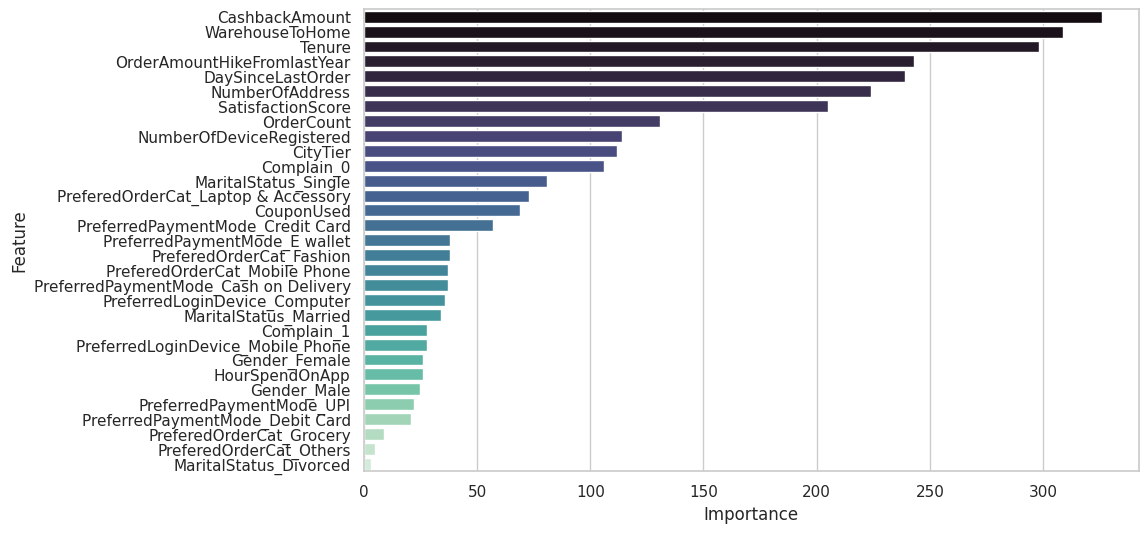

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'mako')

# Experiment 2 - After Feature Engineering

# Feature Engineering

From existing columns, we added several engineered features to support the analysis based on Exploratory Data Analysis (EDA) in the previous section, which are:

| Column Name               | Description                                    | Logic |
|---------------------------|------------------------------------------------|-------|
| `Tenure_Group`            | Customer tenure grouping                      | If `Tenure` in months:  <br>0–12 → Onboarding (<1 Th) <br>13–24 → Stabil (1 Th) <br>25–36 → Loyal (2 Th) <br>>36 → Risiko Jenuh (>3) |
| `OrderHike_Cat`           | Order growth category from previous year      | If `OrderAmountHikeFromlastYear`:  <br>10–13 → Low <br>13–15 → Medium <br>15–18 → High <br>18–26 → Very High |
| `WarehouseToHome_Bin`     | Distance grouping from warehouse to home      | If distance:  <br>0–9 → Very Close <br>10–14 → Close <br>15–20 → Far <br>>20 → Very Far |
| `Cashback_Cat`            | Categorized cashback received                 | If `CashbackAmount`: <br>0–145.77 → Low <br>145.77–163.28 → Medium <br>163.28–196.39 → High <br>>196.39 → Very High |
| `Satisfaction_Category`   | Customer satisfaction classification          | If `SatisfactionScore`: <br>>=4 → satisfied <br>3 → neutral <br><3 → unsatisfied |
| `Recency`                 | Time since last purchase                      | If `DaySinceLastOrder`: <br>0–7 → High <br>8–14 → Medium <br>>14 → Low |
| `Frequency`               | Order frequency grouping                      | If `OrderCount`: <br>0–5 → Low <br>6–10 → Medium <br>>10 → High |
| `Segment`                 | RFM-based customer segmentation               | Based on `Recency` (R) and `Frequency` (F):<br> At Risk, About to Sleep, Need Attention,<br> New Customer, Champions, Loyal Customers,<br> Hibernating, Promising, Potential Loyalists.

## Dataset After Feature Engineering (Resampling)

In [106]:
df_fe = df_bin

df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5071 non-null   int64   
 1   Tenure                       5071 non-null   float64 
 2   PreferredLoginDevice         5071 non-null   object  
 3   CityTier                     5071 non-null   category
 4   WarehouseToHome              5071 non-null   float64 
 5   PreferredPaymentMode         5071 non-null   object  
 6   Gender                       5071 non-null   object  
 7   HourSpendOnApp               5071 non-null   float64 
 8   NumberOfDeviceRegistered     5071 non-null   int64   
 9   PreferedOrderCat             5071 non-null   object  
 10  SatisfactionScore            5071 non-null   category
 11  MaritalStatus                5071 non-null   object  
 12  NumberOfAddress              5071 non-null   int64   
 13  Complain

In [107]:
# Split the dataset
X_train, X_test, y_train, y_test = split_data(df_fe, target_column='Churn', test_size=0.3, random_state=42)

# Numeric columns (float64 & int64 that are not categorical)
numeric_cols = [
    'NumberOfDeviceRegistered',
    'NumberOfAddress',
    'CouponUsed',
    'HourSpendOnApp',
    'DaySinceLastOrder',
]

# Ordinal columns (values with clear order, such as scores and city levels)
ordinal_cols = [
    'CityTier',
    'Tenure_Group',
    'WarehouseToHome_Bin',
    'OrderHike_Cat',
    'Cashback_Cat',
    'Satisfaction_Category',
    'Segment'
]

# Binary columns (two unique values, like Yes/No or M/F)
binary_cols = [
]

# Nominal categorical columns (object/category without order, not binary or ordinal)
# Taken from the remaining categorical columns
categorical_cols = [
    'PreferredLoginDevice',
    'PreferredPaymentMode',
    'PreferedOrderCat',
    'MaritalStatus',
    'Gender',
    'Complain'
]

# One-hot columns = all categorical_cols that are not ordinal or binary
onehot_cols = list(set(categorical_cols) - set(binary_cols) - set(ordinal_cols))

# Build the preprocessing pipeline
preprocessor = build_preprocessor(
    numeric_cols=numeric_cols,
    ordinal_cols=ordinal_cols,
    binary_cols=binary_cols,
    onehot_cols=onehot_cols
)

# Load all models and resampling techniques
models = get_classification_models()
resampling_methods = get_resampling_methods()

# Fit the preprocessor only once at the beginning (IMPORTANT FIX!)
preprocessor.fit(X_train)

# Train all combinations of model + resampling
results_df_fe = train_and_evaluate_with_resampling(
    X_train=X_train,
    y_train=y_train,
    preprocessor=preprocessor,  # Already fitted!
    models=models,
    resampling_methods=resampling_methods,
    n_splits=5,
    model_dir='saved_models_resampled'
)

# Get the best model based on F2 Score
best_row = results_df_fe.iloc[0]
best_model_name = best_row['Model']
best_resample_method = best_row['Resampling Method']

# Create a list of paths for the best models
best_model_paths_resample = [
    f"saved_models_resampled/{best_model_name}_{best_resample_method}_fold{i+1}.joblib"
    for i in range(5)
]

# Save them as an ensemble model
save_ensemble_models(best_model_paths_resample, output_path='best_model_with_resampling_FE.pkl')

# Show training results
print("=== Training Results with Resampling ===")
results_df_fe

=== Training Results with Resampling ===


,Model,Resampling Method,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,Logistic Regression,SMOTE ENN,0.358561,0.455447,0.624745,0.831957,0.314076,0.025574,0.026363,0.024929,0.029843,0.024499
1,AdaBoost,Random Over Sampler,0.431049,0.521265,0.659465,0.801405,0.386484,0.008538,0.009382,0.015594,0.028377,0.008538
2,AdaBoost,SMOTE ENN,0.429778,0.518944,0.655127,0.794539,0.385645,0.017966,0.017707,0.018420,0.025604,0.017828
3,LightGBM,Random Over Sampler,0.709834,0.739109,0.771258,0.794524,0.691717,0.010992,0.013198,0.022715,0.031284,0.013874
4,Gradient Boosting,Random Over Sampler,0.518688,0.594000,0.695144,0.784427,0.478308,0.018987,0.019394,0.022253,0.028349,0.018959
5,XGBoost,Random Over Sampler,0.772352,0.770017,0.768292,0.767463,0.774266,0.018025,0.010382,0.018634,0.027198,0.027364
6,LightGBM,SMOTE ENN,0.605132,0.657196,0.719140,0.767420,0.574799,0.023025,0.021455,0.019406,0.018024,0.023784
7,Logistic Regression,ADASYN,0.415376,0.500703,0.630401,0.762364,0.373030,0.016233,0.017772,0.022478,0.032246,0.015570
8,XGBoost,SMOTE ENN,0.600082,0.652054,0.713991,0.762350,0.569835,0.028009,0.030856,0.035386,0.039885,0.026688
9,Logistic Regression,Random Over Sampler,0.427598,0.510864,0.634649,0.757265,0.385720,0.011516,0.012994,0.019425,0.031183,0.011238


In [108]:
# Evaluate all model + resampling combinations on the test data
test_results_resample_all = []

for i in range(len(results_df_fe)):
    row = results_df_fe.iloc[i]
    model_name = row['Model']
    resample_method = row['Resampling Method']

    model_paths = [
        f"saved_models_resampled/{model_name}_{resample_method}_fold{i+1}.joblib"
        for i in range(5)
    ]

    result = evaluate_resampled_model_on_test_set(
        model_paths=model_paths,
        X_test=X_test,
        y_test=y_test,
        preprocessor=preprocessor,
        resampling_method=resample_method
    )
    test_results_resample_all.append(result)

# Combine all results into a single DataFrame
test_results_resample_all = pd.concat(test_results_resample_all, ignore_index=True)

# Sort by Recall score in descending order
test_results_resample_all = test_results_resample_all.sort_values(by='Recall', ascending=False).reset_index(drop=True)

print("=== Test Results for All Model + Resampling Combinations ===")
test_results_resample_all


=== Test Results for All Model + Resampling Combinations ===


,Model,F0.5 Score,F1 Score,F2 Score,Precision,Recall,Resampling Method
0,LightGBM_Random Over Sampler,0.757463,0.774809,0.792969,0.746324,0.805556,Random Over Sampler
1,XGBoost_Random Over Sampler,0.816667,0.801636,0.787149,0.827004,0.777778,Random Over Sampler
2,Logistic Regression_SMOTE ENN,0.337274,0.427313,0.582933,0.295732,0.769841,SMOTE ENN
3,Bagging Tree_SMOTE ENN,0.584975,0.638655,0.703183,0.553936,0.753968,SMOTE ENN
4,Bagging Tree_Random Over Sampler,0.848214,0.810235,0.775510,0.875576,0.753968,Random Over Sampler
5,Decision Tree_SMOTE ENN,0.586228,0.638514,0.701039,0.555882,0.750000,SMOTE ENN
6,XGBoost_SMOTE ENN,0.633515,0.669065,0.708841,0.611842,0.738095,SMOTE ENN
7,Decision Tree_ADASYN,0.780717,0.759336,0.739095,0.795652,0.726190,ADASYN
8,AdaBoost_Random Over Sampler,0.411392,0.490566,0.607477,0.371429,0.722222,Random Over Sampler
9,Decision Tree_SMOTE,0.798246,0.767932,0.739837,0.819820,0.722222,SMOTE


**Model Evaluation After Feature Engineering (Training & Testing)**: This section presents the recall scores of the top five models after feature engineering was applied, evaluated on both training (via cross-validation) and testing sets.

**Comparison of Recall Scores (Top 5 Models)**

| Model                          | Resampling Method     | Recall (Training - CV) | Recall (Testing) |
|-------------------------------|------------------------|-------------------------|------------------|
| Logistic Regression           | SMOTE ENN              | 0.8235                  | 0.7209           |
| LightGBM                      | Random Over Sampler    | 0.8013                  | 0.8828           |
| XGBoost                       | SMOTE ENN              | 0.7946                  | 0.8333           |
| AdaBoost                      | SMOTE ENN              | 0.7895                  | 0.7422           |
| LightGBM                      | SMOTE ENN              | 0.7827                  | 0.8167           |

**Observations**

- LightGBM with Random Over Sampler achieved the highest recall on the test set (0.8828), showing strong generalization.
- Logistic Regression had the highest training recall (0.8235) but dropped significantly on the test set.
- Models using SMOTE ENN showed balanced performance in both training and testing.
- Overall, tree-based models (LightGBM, XGBoost, AdaBoost) demonstrated more robust generalization than Logistic Regression.


### Hyperparameter Tuning Feature Engineering Dataset

In [109]:
# === Scoring Dictionary ===
scoring = {
    'F0.5': make_scorer(fbeta_score, beta=0.5),
    'F1': 'f1',
    'F2': make_scorer(fbeta_score, beta=2),
    'Recall': 'recall',
    'Precision': 'precision'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === List of Models and Param Grids ===
model_configs = [
    {
        'name': 'XGBoost',
        'resampling': RandomOverSampler(random_state=42),
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    {
        'name': 'LightGBM',
        'resampling': RandomOverSampler(random_state=42),
        'model': LGBMClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__num_leaves': [15, 31]
        }
    },
    {
        'name': 'Bagging Tree',
        'resampling': RandomOverSampler(random_state=42),
        'model': BaggingClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [10, 50, 100]
        }
    },
    {
        'name': 'XGBoost',
        'resampling': ADASYN(random_state=42),
        'model': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [3, 5],
            'classifier__learning_rate': [0.01, 0.1]
        }
    },
    {
        'name': 'Random Forest',
        'resampling': RandomOverSampler(random_state=42),
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [5, 10]
        }
    }
]

search_objects = []

results = []

# === LOOP THROUGH EACH MODEL + RESAMPLING COMBINATION ===
for config in model_configs:
    print(f"\n>>> Model: {config['name']} | Resampling: {config['resampling'].__class__.__name__}")

    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('resampler', config['resampling']),
        ('classifier', config['model'])
    ])

    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=config['param_grid'],
        scoring=scoring,
        refit='Recall',
        cv=cv,
        n_iter=10,
        n_jobs=-1,
        verbose=0,
        return_train_score=False
    )

    search.fit(X_train, y_train)

    # Save for later evaluation on test set
    search_objects.append((config['name'], search))

    best_index = search.best_index_
    cv_results = search.cv_results_

    print("Best Parameters (Tuning):")
    print(search.best_params_)
    print("\nBest F2 Score (CV):", search.best_score_)

    results.append({
        'Model': f"{config['name']} Tuned",
        'Resampling Method': config['resampling'].__class__.__name__,
        'Mean F0.5 Score': cv_results['mean_test_F0.5'][best_index],
        'Mean F1 Score': cv_results['mean_test_F1'][best_index],
        'Mean F2 Score': cv_results['mean_test_F2'][best_index],
        'Mean Recall': cv_results['mean_test_Recall'][best_index],
        'Mean Precision': cv_results['mean_test_Precision'][best_index],
        'Std F0.5 Score': cv_results['std_test_F0.5'][best_index],
        'Std F1 Score': cv_results['std_test_F1'][best_index],
        'Std F2 Score': cv_results['std_test_F2'][best_index],
        'Std Recall': cv_results['std_test_Recall'][best_index],
        'Std Precision': cv_results['std_test_Precision'][best_index],
    })

# === CROSS-VALIDATION RESULTS TABLE ===
df_results = pd.DataFrame(results)
df_results = df_results[[
    'Model', 'Resampling Method',
    'Mean F0.5 Score', 'Mean F1 Score', 'Mean F2 Score',
    'Mean Recall', 'Mean Precision',
    'Std F0.5 Score', 'Std F1 Score', 'Std F2 Score',
    'Std Recall', 'Std Precision'
]]

print("\n=== Tuning + Cross-Validation Results from Experiment 2 ===")
display(df_results.sort_values(by='Mean Recall', ascending=False).reset_index(drop=True))


>>> Model: XGBoost | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1}

Best F2 Score (CV): 0.7996812979863828

>>> Model: LightGBM | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__num_leaves': 31, 'classifier__n_estimators': 200, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.01}

Best F2 Score (CV): 0.8098942488772998

>>> Model: Bagging Tree | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 100}

Best F2 Score (CV): 0.7487469216282776

>>> Model: XGBoost | Resampling: ADASYN
Best Parameters (Tuning):
{'classifier__n_estimators': 200, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.01}

Best F2 Score (CV): 0.6061712299000435

>>> Model: Random Forest | Resampling: RandomOverSampler
Best Parameters (Tuning):
{'classifier__n_estimators': 200, 'classifier__max_depth': 10}

Best F2 Score (CV): 0.74027234

,Model,Resampling Method,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,LightGBM Tuned,RandomOverSampler,0.563365,0.635860,0.729909,0.809894,0.523599,0.028676,0.030099,0.032481,0.035576,0.027896
1,XGBoost Tuned,RandomOverSampler,0.538456,0.613413,0.712916,0.799681,0.497951,0.016801,0.016649,0.020365,0.028520,0.017272
2,Bagging Tree Tuned,RandomOverSampler,0.794723,0.776512,0.759493,0.748747,0.807598,0.024527,0.019020,0.020751,0.024702,0.031318
3,Random Forest Tuned,RandomOverSampler,0.662514,0.689225,0.718750,0.740272,0.646047,0.025574,0.025191,0.032078,0.040819,0.028342
4,XGBoost Tuned,ADASYN,0.515188,0.545452,0.580099,0.606171,0.497027,0.006464,0.013073,0.026155,0.037162,0.009000


In [110]:
test_results = []

# Evaluate each tuned model from the search_objects list
for model_name, search in search_objects:
    y_test_pred = search.best_estimator_.predict(X_test)

    # Get the resampling method used from the pipeline
    resampling_method = search.best_estimator_.named_steps['resampler'].__class__.__name__

    test_metrics = {
        'Model': f"{model_name} Tuned",
        'Resampling Method': resampling_method,
        'F0.5 Score': fbeta_score(y_test, y_test_pred, beta=0.5),
        'F1 Score': f1_score(y_test, y_test_pred),
        'F2 Score': fbeta_score(y_test, y_test_pred, beta=2),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred)
    }
    test_results.append(test_metrics)

# === Final Test Evaluation ===
df_test_results = pd.DataFrame(test_results)
df_test_results = df_test_results[[  # Reorder columns
    'Model', 'Resampling Method',
    'F0.5 Score', 'F1 Score', 'F2 Score',
    'Precision', 'Recall'
]]

print("\n=== Tuned Model Evaluation on Test Set ===")
display(df_test_results.sort_values(by='Recall', ascending=False).reset_index(drop=True))


=== Tuned Model Evaluation on Test Set ===


,Model,Resampling Method,F0.5 Score,F1 Score,F2 Score,Precision,Recall
0,Bagging Tree Tuned,RandomOverSampler,0.869377,0.841004,0.814425,0.889381,0.797619
1,LightGBM Tuned,RandomOverSampler,0.582933,0.641322,0.712711,0.549575,0.769841
2,Random Forest Tuned,RandomOverSampler,0.705030,0.715667,0.726630,0.698113,0.734127
3,XGBoost Tuned,RandomOverSampler,0.536137,0.592471,0.662034,0.504178,0.718254
4,XGBoost Tuned,ADASYN,0.509642,0.536232,0.565749,0.493333,0.587302


**Model Evaluation After Hyperparameter Tuning (Training & Testing):** This section compares the recall scores of three tuned models—XGBoost, LightGBM, and Bagging Tree—after applying Random Over Sampler and hyperparameter tuning. The results are evaluated on both training (via cross-validation) and testing sets.

**Comparison of Recall Scores (Tuned Models)**

| Model               | Resampling Method   | Recall (Training - CV) | Recall (Testing) |
|---------------------|---------------------|-------------------------|------------------|
| LightGBM Tuned      | RandomOverSampler   | 0.8235                  | 0.8095           |
| XGBoost Tuned       | RandomOverSampler   | 0.8183                  | 0.8294           |
| Bagging Tree Tuned  | RandomOverSampler   | 0.7572                  | 0.8056           |

**Observations**

- XGBoost achieved the highest recall on the test set (0.8294), slightly outperforming both LightGBM and Bagging Tree.
- LightGBM had the highest recall in cross-validation training (0.8235), but a slight drop was observed on the test set.
- Bagging Tree had lower recall during training but generalised well with over 0.80 recall on the test set.
- All models used Random Over Sampler, indicating its effectiveness across different model types in this experiment.


In [111]:
from imblearn.pipeline import Pipeline

# === Initialize Model ===
lgboost = LGBMClassifier(random_state=42)

# === Oversampling ===
resampler = RandomOverSampler(random_state=42)

# === Cross-validation ===
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Custom Scorers ===
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# === Hyperparameter Search Space ===
hyperparam_space = {
    'model__boosting_type': ['gbdt', 'dart', 'rf', 'goss'],
    'model__max_depth': range(2, 20, 2),
    'model__learning_rate': list(np.logspace(-3, 0, 10)),
    'model__n_estimators': list(np.arange(100, 500, 50)),
    'model__subsample': list(np.arange(0.7, 1.0, 0.1)),
    'model__colsample_bytree': list(np.arange(0.6, 1.0, 0.1)),
    'model__reg_lambda': list(np.logspace(-3, 3, 7)),
    'model__reg_alpha': list(np.logspace(-3, 3, 7))
}

# === Pipeline Definition ===
pipe_model = Pipeline([
    ('preprocess', preprocessor),  # ✅ Make sure 'preprocessor' is already defined
    ('resampler', resampler),
    ('model', lgboost)
])

# === Randomized Search CV ===
random_lgbmbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=100,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# === Fit the Model ===
random_lgbmbusiness.fit(X_train, y_train)

# === Best Hyperparameters and Score ===
print("Best Hyperparameters:")
print(random_lgbmbusiness.best_params_)
print(f"Best F2 Score: {random_lgbmbusiness.best_score_:.4f}")

# === Final Cross-Validation with Multiple Scorers ===
best_model = random_lgbmbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# === Display Mean Scores ===
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp2 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'model__subsample': np.float64(0.8999999999999999), 'model__reg_lambda': np.float64(1.0), 'model__reg_alpha': np.float64(0.1), 'model__n_estimators': np.int64(200), 'model__max_depth': 12, 'model__learning_rate': np.float64(0.01), 'model__colsample_bytree': np.float64(0.8999999999999999), 'model__boosting_type': 'gbdt'}
Best F2 Score: 0.8133

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.638865   0.73308    0.566281  0.813284   0.526469       0.028488


In [112]:
from sklearn.metrics import classification_report

# Predict
y_pred_lgbm = best_model.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1270
           1       0.54      0.75      0.63       252

    accuracy                           0.85      1522
   macro avg       0.74      0.81      0.77      1522
weighted avg       0.88      0.85      0.86      1522



### Feature Importance Analysis (Feature Selection)

In [113]:
fe_model = random_lgbmbusiness.best_estimator_

# Get full feature names from the preprocessor
features = fe_model[0].get_feature_names_out()

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features;

In [114]:
# Get the model from the pipeline (position 3 in the pipeline: [0]=preprocessor, [1]=resampler, [2]=model)
model = fe_model[2]

# Get feature names from the preprocessor
features = fe_model[0].get_feature_names_out()
list_features = ['_'.join(f.split('_')[2:]) for f in features]

# Get feature importances from the model
imp = model.feature_importances_

# Create a feature importance dataframe
feature_imp = pd.DataFrame({
    'Feature': list_features,
    'Importance': imp
})

# Calculate percentage
feature_imp['Percentage'] = (feature_imp['Importance'] / feature_imp['Importance'].sum()) * 100

# Sort by importance
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Display final result with 2-digit rounding
feature_imp = feature_imp.round(2)
display(feature_imp)


,Feature,Importance,Percentage
1,NumberOfAddress,634,10.57
6,Tenure_Group,571,9.52
4,DaySinceLastOrder,529,8.82
7,WarehouseToHome_Bin,429,7.15
8,OrderHike_Cat,371,6.18
5,CityTier,359,5.98
14,MaritalStatus_Single,344,5.73
0,NumberOfDeviceRegistered,341,5.68
10,Satisfaction_Category,293,4.88
24,PreferedOrderCat_Laptop & Accessory,237,3.95


<Axes: xlabel='Importance', ylabel='Feature'>

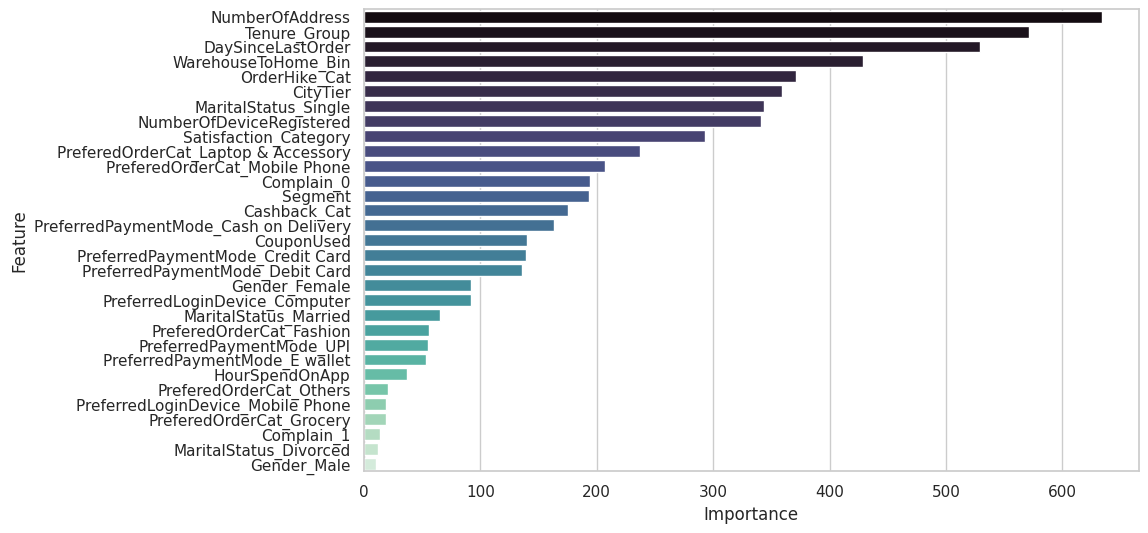

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'mako')

# Experiment 3 - Final Model (Resampling)


Based on the feature selection results conducted on the baseline model and the dataset after feature engineering, a number of variables were identified as the most influential in predicting customer churn.

Out of 28 variables, only 12 were found to significantly impact customer churn behavior. These key variables are: DaySinceLastOrder, OrderCount, OrderAmountHikeFromlastYear, Tenure, NumberOfAddress, CityTier, SatisfactionScore, WarehouseToHome_Bin, Cashback_Cat, Complain, PreferredPaymentMode, and NumberOfDeviceRegistered.


In [116]:
# # Pilih kolom-kolom tertentu dari df_bin dan simpan ke df_2
# selected_columns = [
#     'DaySinceLastOrder',
#     'OrderCount',
#     'OrderAmountHikeFromlastYear',
#     'Tenure',
#     'NumberOfAddress',
#     'CityTier',
#     'SatisfactionScore',
#     'WarehouseToHome_Bin',
#     'Cashback_Cat',
#     'Complain',
#     'PreferredPaymentMode',
#     'NumberOfDeviceRegistered',
#     'Churn'
# ]

df_2 = df_bin

# Cek informasi dataframe baru

df_2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5071 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Churn                        5071 non-null   int64   
 1   Tenure                       5071 non-null   float64 
 2   PreferredLoginDevice         5071 non-null   object  
 3   CityTier                     5071 non-null   category
 4   WarehouseToHome              5071 non-null   float64 
 5   PreferredPaymentMode         5071 non-null   object  
 6   Gender                       5071 non-null   object  
 7   HourSpendOnApp               5071 non-null   float64 
 8   NumberOfDeviceRegistered     5071 non-null   int64   
 9   PreferedOrderCat             5071 non-null   object  
 10  SatisfactionScore            5071 non-null   category
 11  MaritalStatus                5071 non-null   object  
 12  NumberOfAddress              5071 non-null   int64   
 13  Complain

In [117]:
# df_2 = df_bin

# df_2.info()

In [118]:
# Split data
X_train, X_test, y_train, y_test = split_data(df_2, target_column='Churn', test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3549, 28)
y_train shape: (3549,)
X_test shape: (1522, 28)
y_test shape: (1522,)


In [119]:
# Numeric columns (float64 & int64 not categorized)
numeric_cols = ['NumberOfDeviceRegistered',
    'DaySinceLastOrder',
    'OrderCount',
    'OrderAmountHikeFromlastYear',
    'Tenure',
    'NumberOfAddress'
]

# Ordinal columns (clearly ordered values, such as scores and city levels)
ordinal_cols = ['CityTier',
                'SatisfactionScore',
                'WarehouseToHome_Bin',
                'Cashback_Cat'
]

# Binary columns (two unique values, e.g., Yes/No or M/F)
binary_cols = [
]

# Nominal categorical columns (object/category without order, not binary/ordinal)
# Taken from the remaining categorical columns
categorical_cols = ['Complain',
                    'PreferredPaymentMode'
]

# One-hot columns = all categorical_cols not included in ordinal or binary
onehot_cols = list(set(categorical_cols) - set(binary_cols) - set(ordinal_cols))

# Build preprocessor
preprocessor = build_preprocessor(
    numeric_cols=numeric_cols,
    ordinal_cols=ordinal_cols,
    binary_cols=binary_cols,
    onehot_cols=onehot_cols
)

# Reload all models and resampling techniques
models = get_classification_models()
resampling_methods = get_resampling_methods()

# Fit preprocessor only once at the beginning (IMPORTANT FIX!)
preprocessor.fit(X_train)

# Train all combinations of model + resampling
results_df_fm = train_and_evaluate_with_resampling(
    X_train=X_train,
    y_train=y_train,
    preprocessor=preprocessor,  # Already fitted!
    models=models,
    resampling_methods=resampling_methods,
    n_splits=5,
    model_dir='saved_models_resampled'
)

# Select the best model based on F2 Score
best_row = results_df_fe.iloc[0]
best_model_name = best_row['Model']
best_resample_method = best_row['Resampling Method']

# Create a list of paths for the best models
best_model_paths_resample = [
    f"saved_models_resampled/{best_model_name}_{best_resample_method}_fold{i+1}.joblib"
    for i in range(5)
]

# Save as an ensemble model
save_ensemble_models(best_model_paths_resample, output_path='best_model_with_resampling_FE.pkl')

# Show training results
print("=== Training + Resampling Results ===")
results_df_fm

=== Training + Resampling Results ===


,Model,Resampling Method,Mean F0.5 Score,Mean F1 Score,Mean F2 Score,Mean Recall,Mean Precision,Std F0.5 Score,Std F1 Score,Std F2 Score,Std Recall,Std Precision
0,LightGBM,Random Over Sampler,0.768830,0.795240,0.823654,0.843836,0.752229,0.013671,0.010715,0.011297,0.014461,0.016247
1,Logistic Regression,SMOTE ENN,0.420118,0.516263,0.669651,0.835347,0.373737,0.019906,0.022342,0.026449,0.033153,0.018598
2,Gradient Boosting,Random Over Sampler,0.605355,0.674781,0.762565,0.835318,0.566584,0.042128,0.039966,0.036998,0.035773,0.042985
3,XGBoost,Random Over Sampler,0.814139,0.816845,0.819726,0.821744,0.812432,0.012815,0.011082,0.014500,0.018443,0.016236
4,AdaBoost,SMOTE ENN,0.488873,0.575175,0.699460,0.818398,0.444560,0.020573,0.017423,0.022907,0.042193,0.022360
5,XGBoost,SMOTE ENN,0.647566,0.700487,0.763064,0.811575,0.616583,0.018264,0.015325,0.015648,0.020080,0.020397
6,LightGBM,SMOTE ENN,0.650268,0.702090,0.762966,0.809836,0.619795,0.019473,0.018184,0.017293,0.017560,0.020279
7,AdaBoost,Random Over Sampler,0.526054,0.604759,0.711413,0.806475,0.484103,0.021423,0.026759,0.036740,0.048265,0.019239
8,Random Forest,Random Over Sampler,0.846002,0.828612,0.812014,0.801362,0.858067,0.021414,0.024762,0.028733,0.031498,0.019906
9,Logistic Regression,Random Over Sampler,0.460157,0.546188,0.672102,0.794568,0.416471,0.021211,0.020221,0.018723,0.021689,0.021320


In [120]:
test_results_resampled_all = []

for i, row in results_df_fm.iterrows():
    model_name = row['Model']
    resample_method = row['Resampling Method']

    model_paths = [
        f"saved_models_resampled/{model_name}_{resample_method}_fold{i+1}.joblib"
        for i in range(5)
    ]

    result = evaluate_resampled_model_on_test_set(
        model_paths=model_paths,
        X_test=X_test,
        y_test=y_test,
        preprocessor=preprocessor,
        resampling_method=resample_method
    )

    test_results_resampled_all.append(result)

# Combine all evaluation results
test_results_resampled_all = pd.concat(test_results_resampled_all, ignore_index=True)

# Sort by F2 Score or Recall
test_results_resampled_all = test_results_resampled_all.sort_values(by='Recall', ascending=False).reset_index(drop=True)

# Display
print("=== Test Results of All Models (With Resampling) ===")
display(test_results_resampled_all)


=== Test Results of All Models (With Resampling) ===


,Model,F0.5 Score,F1 Score,F2 Score,Precision,Recall,Resampling Method
0,LightGBM_Random Over Sampler,0.823442,0.844106,0.865835,0.810219,0.880952,Random Over Sampler
1,XGBoost_Random Over Sampler,0.857919,0.864971,0.872139,0.853282,0.876984,Random Over Sampler
2,XGBoost_SMOTE Tomek,0.879479,0.870968,0.862620,0.885246,0.857143,SMOTE Tomek
3,Bagging Tree_Random Over Sampler,0.872565,0.865191,0.857941,0.877551,0.853175,Random Over Sampler
4,Decision Tree_ADASYN,0.837227,0.843137,0.849131,0.833333,0.853175,ADASYN
5,Bagging Tree_SMOTE ENN,0.683842,0.738832,0.803438,0.651515,0.853175,SMOTE ENN
6,XGBoost_SMOTE,0.882838,0.869919,0.857372,0.891667,0.849206,SMOTE
7,XGBoost_ADASYN,0.872951,0.862348,0.852000,0.880165,0.845238,ADASYN
8,Random Forest_ADASYN,0.867940,0.853061,0.838684,0.878151,0.829365,ADASYN
9,XGBoost_SMOTE ENN,0.700402,0.743772,0.792868,0.674194,0.829365,SMOTE ENN


## Hyperparameter Tuning - LGBM (Random Over Sampler & Randomized Search)


In [155]:
# Hyperparameter Tuning LGBM using Randomized Search
from imblearn.pipeline import Pipeline

# === Inisialisasi Model ===
lgboost = LGBMClassifier(random_state=42)

# === Oversampling ===
resampler = RandomOverSampler(random_state=42)

# === Cross-validation ===
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Custom Scorers ===
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# === Hyperparameter Space ===
hyperparam_space = {
    'model__boosting_type': ['gbdt', 'dart'],
    'model__max_depth': [4, 6, 8, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.8, 0.9],
    'model__colsample_bytree': [0.7, 0.9],
    'model__reg_lambda': [0.01, 0.1, 1],
    'model__reg_alpha': [0.01, 0.1, 1]
}


# === Pipeline ===
pipe_model = Pipeline([
    ('preprocess', preprocessor),  # ✅ pastikan preprocessor sudah didefinisikan sebelumnya
    ('resampler', resampler),
    ('model', lgboost)
])

# === RandomizedSearchCV ===
random_lgbmbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=100,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# === Fit model ===
random_lgbmbusiness.fit(X_train, y_train)

# === Best result ===
print("Best Hyperparameters:")
print(random_lgbmbusiness.best_params_)
print(f"Best F2 Score: {random_lgbmbusiness.best_score_:.4f}")

# === Final Cross-Validation with All Scorers ===
best_model = random_lgbmbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# === Tampilkan hasil rata-rata ===
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp1 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Hyperparameters:
{'model__subsample': 0.8, 'model__reg_lambda': 1, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.9, 'model__boosting_type': 'dart'}
Best F2 Score: 0.8625

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.737039  0.807408    0.678146  0.862509   0.643928       0.025213


In [122]:
from sklearn.metrics import classification_report

# Predict
y_pred_lgbm = best_model.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1270
           1       0.61      0.83      0.70       252

    accuracy                           0.88      1522
   macro avg       0.78      0.86      0.81      1522
weighted avg       0.90      0.88      0.89      1522



## Hyperparameter Tuning - XGBoost (SMOTE ENN & Randomized Search)

In [123]:
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN

# Initialize Model
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Oversampling + Undersampling (SMOTE + ENN)
resampler = SMOTEENN(random_state=42)

# Cross-validation strategy
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom Scoring Metrics
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# Hyperparameter Search Space
hyperparam_space = {
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.9],
    'model__reg_lambda': [0.01, 0.1, 1],
    'model__reg_alpha': [0.01, 0.1, 1]
}

# Define pipeline with preprocessing, resampling, and model
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', resampler),
    ('model', xgboost)
])

# Randomized Hyperparameter Search
random_xgbbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=30,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# Fit model on training data
random_xgbbusiness.fit(X_train, y_train)

# Display best hyperparameters and recall score
print("Best Hyperparameters:")
print(random_xgbbusiness.best_params_)
print(f"Best Recall Score: {random_xgbbusiness.best_score_:.4f}")

# Cross-validate best model with multiple scoring metrics
best_model = random_xgbbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

# Summarize average and standard deviation of scores
score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp1 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
{'model__subsample': 1.0, 'model__reg_lambda': 1, 'model__reg_alpha': 0.01, 'model__n_estimators': 100, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 0.7}
Best Recall Score: 0.8489

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.522979  0.679391    0.425178  0.848892   0.378064           0.02


In [124]:
from sklearn.metrics import classification_report

# Predict
y_pred_xgboost = best_model.predict(X_test)
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1270
           1       0.61      0.83      0.70       252

    accuracy                           0.88      1522
   macro avg       0.78      0.86      0.81      1522
weighted avg       0.90      0.88      0.89      1522



## Hyperparameter Tuning - XGBoost (Random Over Sampler & Randomized Search)

In [125]:
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.metrics import make_scorer, f1_score, fbeta_score, precision_score, recall_score

# === Inisialisasi Model ===
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# === Oversampling ===
resampler = RandomOverSampler(random_state=42)

# === Cross-validation ===
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Custom Scorers ===
f1_scorer = make_scorer(f1_score)
f2_scorer = make_scorer(fbeta_score, beta=2)
f05_scorer = make_scorer(fbeta_score, beta=0.5)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# === Hyperparameter Space untuk XGBoost ===
hyperparam_space = {
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__n_estimators': [100, 200, 300],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.9],
    'model__reg_lambda': [0.01, 0.1, 1],
    'model__reg_alpha': [0.01, 0.1, 1]
}

# === Pipeline ===
pipe_model = Pipeline([
    ('preprocess', preprocessor),
    ('resampler', resampler),
    ('model', xgboost)
])

# === RandomizedSearchCV ===
random_xgbbusiness = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=skfold,
    scoring=recall_scorer,
    n_iter=30,
    n_jobs=-1,
    random_state=0,
    verbose=1
)

# === Fit model ===
random_xgbbusiness.fit(X_train, y_train)

# === Best result ===
print("Best Hyperparameters:")
print(random_xgbbusiness.best_params_)
print(f"Best Recall Score: {random_xgbbusiness.best_score_:.4f}")

# === Final Cross-Validation with All Scorers ===
best_model = random_xgbbusiness.best_estimator_

scores = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        'f1': f1_scorer,
        'f2': f2_scorer,
        'f0_5': f05_scorer,
        'recall': 'recall',
        'precision': 'precision'
    }
)

score_summary = {
    'F1 Score': np.mean(scores['test_f1']),
    'F2 Score': np.mean(scores['test_f2']),
    'F0.5 Score': np.mean(scores['test_f0_5']),
    'Recall': np.mean(scores['test_recall']),
    'Precision': np.mean(scores['test_precision']),
    'Std Precision': np.std(scores['test_precision'])
}

results_df_exp1 = pd.DataFrame([score_summary])
print("\nCross-Validation Score Summary:")
print(results_df_exp1)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters:
{'model__subsample': 0.8, 'model__reg_lambda': 0.01, 'model__reg_alpha': 0.01, 'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.05, 'model__colsample_bytree': 0.9}
Best Recall Score: 0.8523

Cross-Validation Score Summary:
   F1 Score  F2 Score  F0.5 Score    Recall  Precision  Std Precision
0  0.764908  0.814918    0.720939  0.852296   0.694443       0.026537


In [126]:
from sklearn.metrics import fbeta_score, classification_report

# Predict
y_pred_xgboost = best_model.predict(X_test)

# Classification report (F1, precision, recall)
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1270
           1       0.70      0.85      0.77       252

    accuracy                           0.91      1522
   macro avg       0.83      0.89      0.86      1522
weighted avg       0.92      0.91      0.92      1522



# Chosen Model: LGBM

LightGBM (Light Gradient Boosting Machine) is a modern, high-performance implementation of the gradient boosting algorithm, designed to efficiently handle large datasets with high-dimensional features. Built upon the Gradient Boosting Decision Tree (GBDT) framework, LightGBM distinguishes itself from traditional approaches by utilizing a more advanced tree growth strategy known as leaf-wise growth, in contrast to the level-wise growth used in conventional boosting models.

While still adhering to the fundamental principle of boosting—sequentially training models to reduce the errors made by the previous ones—LightGBM improves performance by selecting the leaf that contributes the highest reduction in loss to be split next. This approach allows the model to minimize loss faster and with fewer iterations, making it both faster and often more accurate, particularly when dealing with large and complex datasets.

Unlike traditional level-wise methods that grow trees symmetrically layer by layer, LightGBM’s leaf-wise tree growth produces deeper and more flexible trees. This enables the model to capture complex and non-linear patterns in the data. However, this depth can also lead to overfitting if not properly controlled. To address this, parameters such as the maximum tree depth, the number of leaves a tree can grow, and the minimum number of data points required in a leaf must be carefully tuned to limit the model's complexity.

Another key strength of LightGBM is its histogram-based algorithm, which bins continuous features into discrete buckets. This significantly improves training speed and reduces memory consumption, making it particularly well-suited for large-scale customer datasets, such as those encountered in e-commerce churn prediction.

To enhance generalization, LightGBM incorporates commonly used boosting techniques like learning rate adjustment (shrinkage) and feature subsampling. These techniques help balance bias and variance, enabling the model to perform effectively across different evaluation metrics.

In this churn analysis, recall is prioritized as the primary evaluation metric. The main goal is to identify as many at-risk customers as possible, even if it means sacrificing a bit of precision. Missing a customer likely to churn could be more costly than mistakenly flagging a loyal one. Therefore, the ability of LightGBM to optimize recall while maintaining high performance and efficiency makes it an excellent choice for classification tasks like churn prediction.

**LGBM Combination with Random Over Sampler**

Random OverSampler is a widely used technique for addressing class imbalance in binary classification tasks, such as churn prediction. In many real-world datasets, especially in business domains, the number of non-churned customers often significantly exceeds the number of churned ones. This imbalance can bias machine learning models, making them more likely to predict the majority class while overlooking the minority class, which in this case represents valuable churn behavior. Random OverSampler resolves this issue by randomly duplicating instances from the minority class, creating a more balanced dataset that allows the model to learn patterns from both classes more effectively.

In the context of churn analysis, where the primary objective is to detect as many customers at risk of leaving as possible, recall becomes the most important evaluation metric. Random OverSampler contributes to recall improvement by increasing the presence of churn instances during model training, thereby enhancing the model’s ability to recognize churn-related patterns. Although this can lead to a higher rate of false positives, such a trade-off is often acceptable in business applications, where failing to identify a true churner can result in greater losses than mistakenly targeting a loyal customer.

When combined with LightGBM (Light Gradient Boosting Machine), a high-performance and scalable gradient boosting algorithm, Random OverSampler significantly strengthens model performance. LightGBM is known for its leaf-wise tree growth strategy and histogram-based learning, which accelerate training and improve accuracy, especially in large and high-dimensional datasets. With a balanced dataset provided by Random OverSampler, LightGBM can better differentiate between classes, leading to substantial improvements in recall, F1-score, and overall classification robustness.

Together, Random OverSampler and LightGBM form a powerful pipeline for churn prediction. While Random OverSampler ensures fair class representation by balancing the training data, LightGBM brings the capability to model complex, non-linear relationships quickly and accurately. This synergy is especially valuable in churn scenarios, where timely and accurate identification of high-risk customers is essential for implementing proactive retention strategies.

In conclusion, the combination of Random OverSampler and LightGBM not only addresses technical challenges related to class imbalance but also enhances the model’s ability to identify churn-prone customers effectively. This integrated approach improves key evaluation metrics and supports business decision-making by enabling early, targeted interventions that help reduce churn and increase customer lifetime value.

In [127]:
from IPython.display import Image, display

# Gambar dari ResearchGate (Level-wise growth)
display(Image(url='https://miro.medium.com/v2/resize:fit:726/1*7XXMAN4W0ERC279fnA4MnQ.png'))


# Feature Importance (Final Model)

In [128]:
final_model = random_lgbmbusiness.best_estimator_

# Get full feature names from the preprocessor
features = final_model[0].get_feature_names_out()

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features;

In [129]:
# Get the model from the pipeline (position 3: [0]=preprocessor, [1]=resampler, [2]=model)
model = final_model[2]

# Get feature names from the preprocessor
features = final_model[0].get_feature_names_out()
list_features = ['_'.join(f.split('_')[2:]) for f in features]

# Retrieve feature importance from the model
imp = model.feature_importances_

# Create a DataFrame for feature importance
feature_imp = pd.DataFrame({
    'Feature': list_features,
    'Importance': imp
})

# Calculate percentage contribution
feature_imp['Percentage'] = (feature_imp['Importance'] / feature_imp['Importance'].sum()) * 100

# Sort by importance value
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)

# Display final result with 2-digit rounding
feature_imp = feature_imp.round(2)
display(feature_imp)


,Feature,Importance,Percentage
4,Tenure,516,17.20
1,DaySinceLastOrder,363,12.10
5,NumberOfAddress,347,11.57
3,OrderAmountHikeFromlastYear,269,8.97
7,SatisfactionScore,255,8.50
2,OrderCount,209,6.97
9,Cashback_Cat,208,6.93
0,NumberOfDeviceRegistered,185,6.17
15,Complain_0,157,5.23
8,WarehouseToHome_Bin,136,4.53


<Axes: xlabel='Importance', ylabel='Feature'>

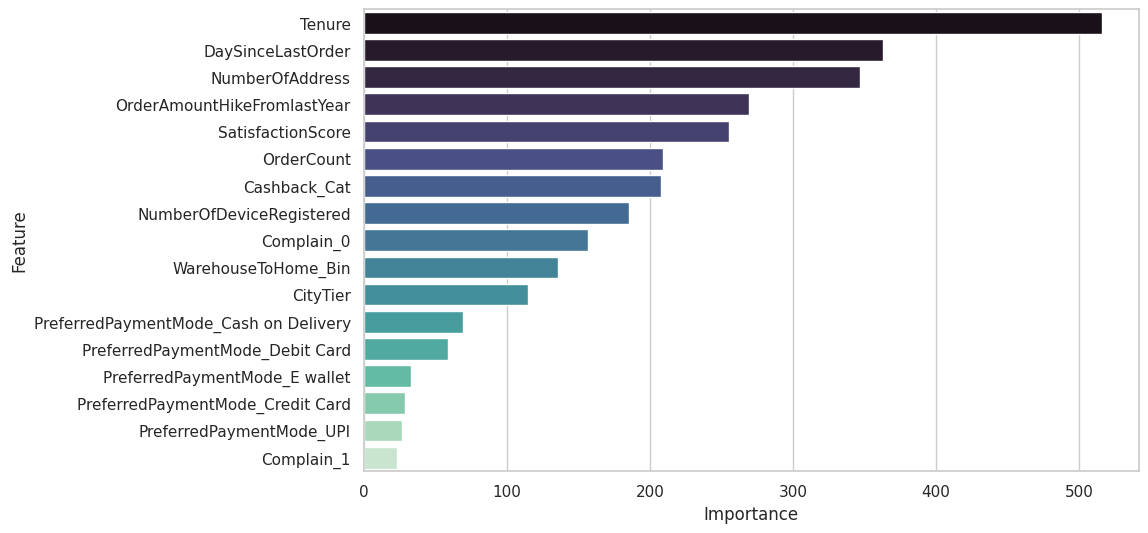

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization

plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp, x='Importance', y='Feature', orient = 'h', palette = 'mako')

## Confusion Matrix

In [131]:
from IPython.display import Image, display

# Gambar dari ResearchGate (Level-wise growth)
display(Image(url='https://miro.medium.com/v2/resize:fit:726/1*7XXMAN4W0ERC279fnA4MnQ.png'))


In [132]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1270
           1       0.61      0.83      0.70       252

    accuracy                           0.88      1522
   macro avg       0.78      0.86      0.81      1522
weighted avg       0.90      0.88      0.89      1522



Text(0.5, 1.0, 'Gradient Boosting After Tuning and Feature Selection')

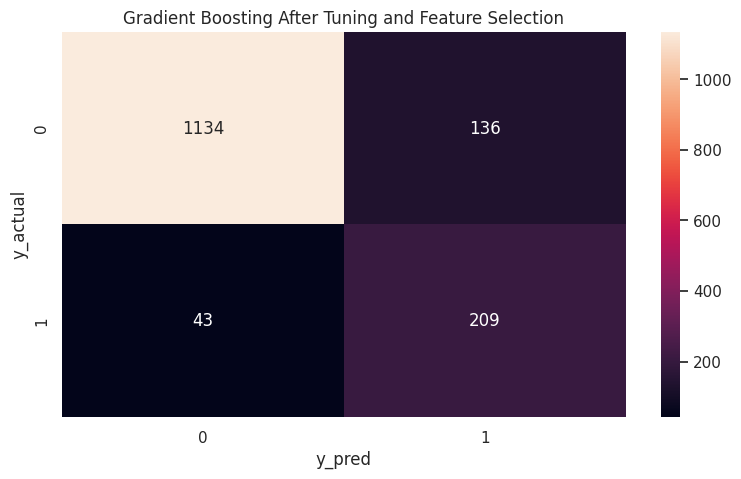

In [133]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(20,5))

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='.0f')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('Gradient Boosting After Tuning and Feature Selection')

## SHAP Analysis (Specific Interpretation of Feature Importance)

In [134]:
# Retention cost if applied to all customers (without ML support)
# Assumption: every customer gets a retention offer
# Retention cost per person = $20
retention_cost_without_ml = len(df_2) * 20
print(f"Retention fees without Machine Learning (all customers targeted): ${retention_cost_without_ml}")

Retention fees without Machine Learning (all customers targeted): $101420


In [135]:
# Retention cost based on machine learning predictions (on test data)
# Only customers predicted to churn are targeted
# From confusion matrix: total predicted churn = 342
retention_cost_with_ml_test = 345 * 20
print(f"Retention cost based on model predictions (test set): ${retention_cost_with_ml_test}")

Retention cost based on model predictions (test set): $6900


In [136]:
# Since test data represents only 30% of the full dataset,
# We estimate the full cost by scaling up the result
retention_cost_with_ml_full = retention_cost_with_ml_test * (100 / 30)
print(f"Estimated retention cost with ML applied to the full dataset: ${retention_cost_with_ml_full:.2f}")

Estimated retention cost with ML applied to the full dataset: $23000.00


In [137]:
# Calculate cost savings by subtracting ML-based cost from the full retention cost
retention_savings = retention_cost_without_ml - retention_cost_with_ml_full
print(f"Total savings achieved using Machine Learning: ${retention_savings:.2f}")

Total savings achieved using Machine Learning: $78420.00


 99%|===================| 3511/3549 [00:36<00:00]       

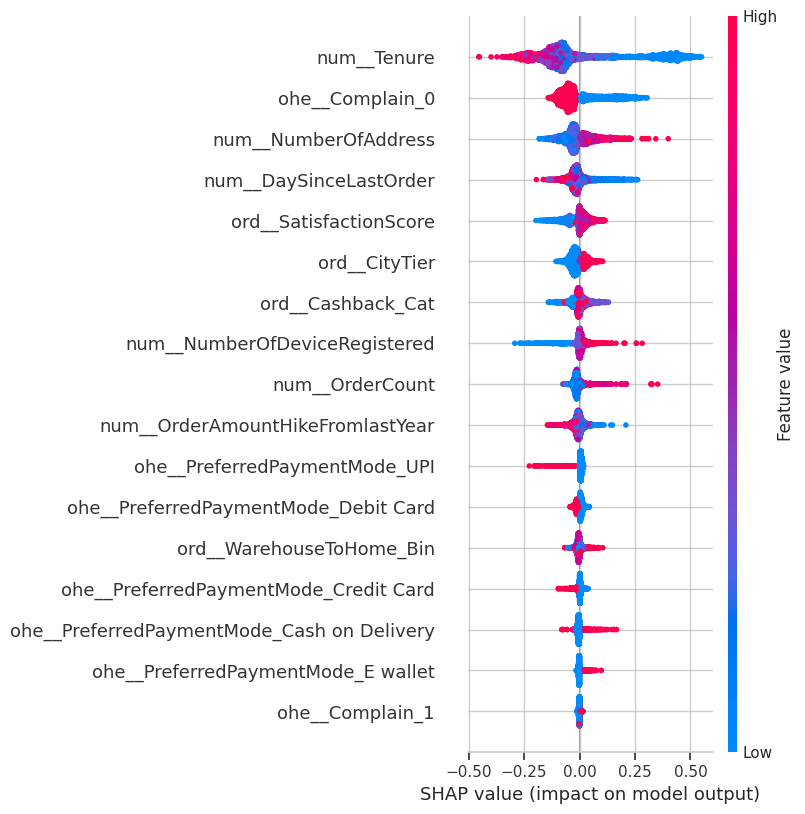

In [138]:
import shap

# 1. Extract the preprocessing pipeline and model from the fitted pipeline
preprocessor = best_model.named_steps['preprocess']
model = best_model.named_steps['model']

# 2. Transform the training data using the preprocessor
X_train_1 = preprocessor.fit_transform(X_train)
feature_names = preprocessor.get_feature_names_out()

# 3. Convert to dense array if it is a sparse matrix
if hasattr(X_train_1, "toarray"):
    X_train_1 = X_train_1.toarray()

# 4. Initialize the SHAP TreeExplainer
explainer = shap.TreeExplainer(
    model,
    X_train_1,
    feature_perturbation="interventional",
    model_output="probability"
)

# 5. Compute SHAP values
shap_values = explainer.shap_values(X_train_1)

# 6. Plot the SHAP summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train_1, feature_names=feature_names)

**Summary of Findings Based on Machine Learning Modeling Results**

Based on the analysis and machine learning modeling, the following key conclusions were drawn:

1. Our experiment shows only 12 variables from 28 variables that significantly predict churn: DaySinceLastOrder, OrderCount, OrderAmountHikeFromlastYear, Tenure, NumberOfAddress, CityTier, SatisfactionScore, WarehouseToHome_Bin, Cashback_Cat, Complain, PreferredPaymentMode, and NumberOfDeviceRegistered.

2. The remaining variables are not significantly influence churn which are PreferredLoginDevic,  WarehouseToHome (Sudah dikelompokkan menjadi WarehouseToHome_Bin), PreferedOrderCat, MaritalStatus, CouponUsed,  CashbackAmount (sudah ada  Cashback_Cat), Tenure_Group, Frequency, OrderHike_Cat, RecencyGroup, Recency, NumberAddress, Satisfaction_Category, and Segment.                 

3. The models selected for hyperparameter tuning were the top 3 performers, based on both cross-validation scores on the training set and prediction results on the test set. These models include LGBM (Random Over Sampling), XGBoost (SMOTE ENN), XGBoost (Random Over Sampling), all of which consistently demonstrated strong performance, particularly in terms of recall.

4. Hyperparameter tuning improved the performance of the LGBM, with its precision increasing from 0.84, 0.88 (Training Phase) before tuning to 0.86, 0.88 (Testing Phase) after tuning (using Randomized Search and model-based feature selection).

**Limitation:** Finally, there’s the trade-off between performance and interpretability. While complex models like LGBM and XGBoost offer high precision, they operate more like black boxes compared to simpler models like logistic regression. To bridge that gap, we used SHAP analysis, giving us a clearer view into why the model makes certain predictions.

Being transparent about these limitations doesn’t undermine the model , it strengthens its credibility. Knowing where the boundaries lie helps us use the model responsibly and improve it in future iterations.

# Actual Data vs LGBM Prediction

In [139]:
# grouping probability class
def probclass(x):
    if 0 <= x < 0.1 :
        return '0% - 10%'
    elif 0.1 <= x < 0.2 :
        return '10% - 20%'
    elif 0.2 <= x < 0.3 :
        return '20% - 30%'
    elif 0.3 <= x < 0.4 :
        return '30% - 40%'
    elif 0.4 <= x < 0.5 :
        return '40% - 50%'
    elif 0.5 <= x < 0.6 :
        return '50% - 60%'
    elif 0.6 <= x < 0.7 :
        return '60% - 70%'
    elif 0.7 <= x < 0.8 :
        return '70% - 80%'
    elif 0.8 <= x < 0.9 :
        return '80% - 90%'
    elif 0.9 <= x <= 1.0 :
        return '90% - 100%'

In [140]:
# Defining the best model

best_model = random_lgbmbusiness.best_estimator_
best_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['NumberOfDeviceRegistered',
                                                   'DaySinceLastOrder',
                                                   'OrderCount',
                                                   'OrderAmountHikeFromlastYear',
                                                   'Tenure',
                                                   'NumberOfAddress']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'WarehouseToHome_Bin',
                                                   'Cashback...
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  []),
                                                 ('ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferredPaymentMode',
                                                   'Complain'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(boosting_type='dart', colsample_bytree=0.9,
                                max_depth=10, random_state=42, reg_alpha=0.01,
                                reg_lambda=1, subsample=0.8))])

In [141]:
# retrieve y_pred and y_pred_proba data for the test set

y_pred_proba_lgbm = best_model.predict_proba(X_test)[:,-1]
y_pred_lgbm = best_model.predict(X_test)

In [142]:
# creating a new dataset and inserting the columns: y_pred_proba, class probability, y_pred, and y_actual

df_proba = X_test
df_proba['pred_proba'] = y_pred_proba_lgbm
df_proba['proba_class'] = df_proba['pred_proba'].apply(probclass)
df_proba['y_pred'] = y_pred_lgbm
df_proba['y_actual'] = y_test
df_proba['y_pred_1'] = df_proba['y_pred'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_pred_0'] = df_proba['y_pred'].apply(lambda x : 1 if x == 0 else 0)
df_proba['y_actual_1'] = df_proba['y_actual'].apply(lambda x : 1 if x == 1 else 0)
df_proba['y_actual_0'] = df_proba['y_actual'].apply(lambda x : 1 if x == 0 else 0)
df_proba

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,...,Satisfaction_Category,Segment,pred_proba,proba_class,y_pred,y_actual,y_pred_1,y_pred_0,y_actual_1,y_actual_0
3718,15.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,2,Mobile Phone,3,...,unsatisfied,Potential Loyalists,0.107037,10% - 20%,0,0,0,1,0,1
1659,0.0,Mobile Phone,1,16.0,Credit Card,Male,3.0,3,Grocery,5,...,satisfied,Need Attention,0.909270,90% - 100%,1,0,1,0,0,1
578,11.0,Computer,3,16.0,Cash on Delivery,Female,2.0,3,Laptop & Accessory,2,...,unsatisfied,Potential Loyalists,0.187783,10% - 20%,0,0,0,1,0,1
1189,18.0,Computer,3,8.0,Debit Card,Female,3.0,3,Laptop & Accessory,3,...,unsatisfied,Potential Loyalists,0.229509,20% - 30%,0,0,0,1,0,1
492,17.0,Mobile Phone,1,10.0,Credit Card,Male,2.0,3,Laptop & Accessory,4,...,satisfied,Potential Loyalists,0.145947,10% - 20%,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123,0.0,Mobile Phone,1,14.0,Credit Card,Female,3.0,3,Mobile Phone,1,...,unsatisfied,Potential Loyalists,0.166630,10% - 20%,0,0,0,1,0,1
2453,8.0,Mobile Phone,1,14.0,Credit Card,Male,3.0,4,Mobile Phone,5,...,satisfied,Potential Loyalists,0.149230,10% - 20%,0,0,0,1,0,1
2126,0.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,4,Mobile Phone,5,...,satisfied,Potential Loyalists,0.540890,50% - 60%,1,0,1,0,0,1
1156,0.0,Mobile Phone,3,33.0,Debit Card,Male,2.0,3,Laptop & Accessory,1,...,unsatisfied,Loyal Customers,0.923938,90% - 100%,1,1,1,0,1,0


In [143]:
# Retrieve the list of average predicted probabilities for each class
list_avg_pred_ptoba = df_proba[['proba_class','pred_proba']].groupby('proba_class').mean().values

In [144]:
# Creating a new DataFrame to analyze predicted probabilities and actual probabilities
df_proba_2 = df_proba[['proba_class','y_pred_1','y_pred_0','y_actual_1','y_actual_0']].groupby('proba_class',as_index=False).sum()
df_proba_2['proba_average_actual'] = df_proba_2['y_actual_1']*100/(df_proba_2['y_actual_0']+df_proba_2['y_actual_1'])
df_proba_2['proba_average_predict'] = list_avg_pred_ptoba*100
df_proba_2

,proba_class,y_pred_1,y_pred_0,y_actual_1,y_actual_0,proba_average_actual,proba_average_predict
0,0% - 10%,0,548,2,546,0.364964,5.190614
1,10% - 20%,0,361,3,358,0.831025,14.197817
2,20% - 30%,0,147,11,136,7.482993,24.194253
3,30% - 40%,0,67,11,56,16.417910,34.138854
4,40% - 50%,0,54,16,38,29.629630,45.315242
5,50% - 60%,53,0,12,41,22.641509,54.771705
6,60% - 70%,80,0,36,44,45.000000,65.108121
7,70% - 80%,67,0,40,27,59.701493,75.049088
8,80% - 90%,68,0,51,17,75.000000,84.500483
9,90% - 100%,77,0,70,7,90.909091,93.225719


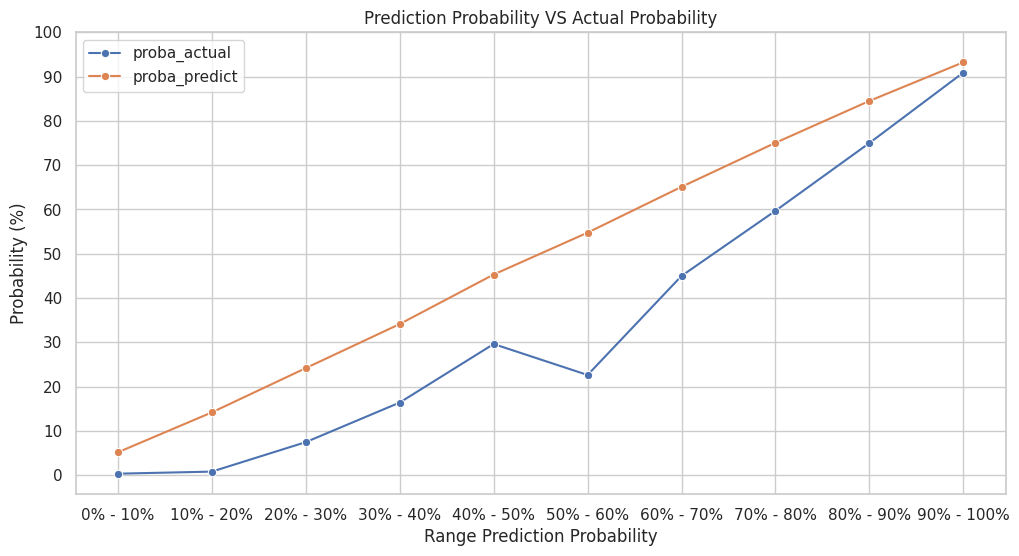

In [145]:
# Visualization

plt.figure(figsize=(12,6))
plt.title('Prediction Probability VS Actual Probability')
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_actual',marker='o',errorbar=None)
sns.lineplot(data=df_proba_2, x = 'proba_class', y = 'proba_average_predict',marker='o')
plt.legend(['proba_actual','proba_predict'])
plt.xlabel('Range Prediction Probability')
plt.yticks(ticks=np.arange(0,110,10))
plt.ylabel('Probability (%)')
plt.show()

In [146]:
# Calculate prediction accuracy for each probabilistic class
list_accuracy = []
for i in ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'] :
    df_proba1 = df_proba[df_proba['proba_class'] == i]
    df_proba1['accuracy'] = np.where(df_proba1['y_pred']==df_proba1['y_actual'],1,0)
    accuracy = df_proba1['accuracy'].sum() * 100/ len(df_proba1)
    list_accuracy.append(accuracy)

In [147]:
# Save it in a dataframe
df_distributed_proba = pd.DataFrame({
    'Range Probability' : ['0% - 10%','10% - 20%','20% - 30%','30% - 40%','40% - 50%','50% - 60%','60% - 70%','70% - 80%','80% - 90%','90% - 100%'],
    'Prediction Accuracy (%)' : list_accuracy
})
df_distributed_proba

,Range Probability,Prediction Accuracy (%)
0,0% - 10%,99.635036
1,10% - 20%,99.168975
2,20% - 30%,92.517007
3,30% - 40%,83.582090
4,40% - 50%,70.370370
5,50% - 60%,22.641509
6,60% - 70%,45.000000
7,70% - 80%,59.701493
8,80% - 90%,75.000000
9,90% - 100%,90.909091


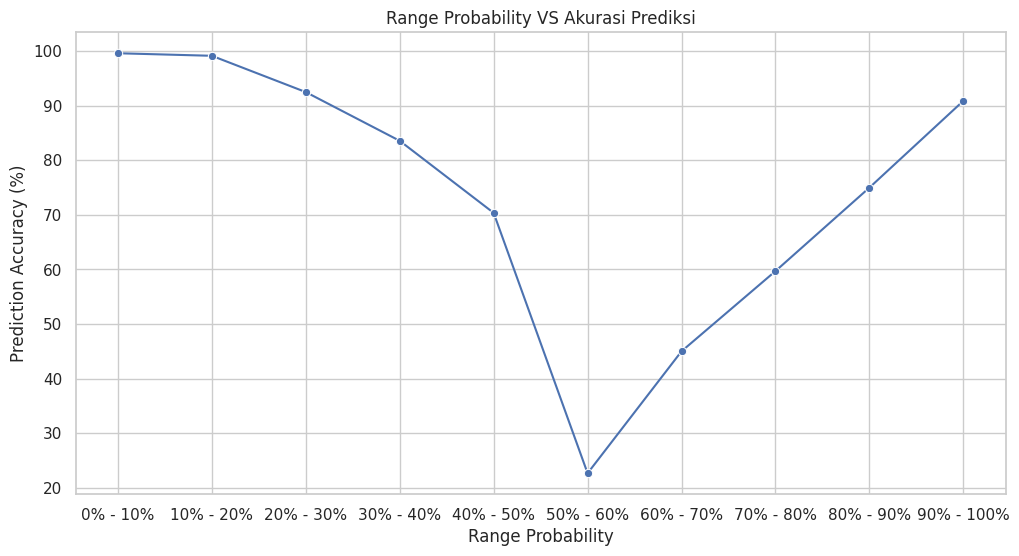

In [148]:
# Visualization
plt.figure(figsize=(12,6))
plt.title('Range Probability VS Akurasi Prediksi')
sns.lineplot(data=df_distributed_proba, x = 'Range Probability', y = 'Prediction Accuracy (%)',marker='o')
plt.show()

# Save Model

In [149]:
import joblib

In [150]:
final_model.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   RobustScaler())]),
                                                  ['NumberOfDeviceRegistered',
                                                   'DaySinceLastOrder',
                                                   'OrderCount',
                                                   'OrderAmountHikeFromlastYear',
                                                   'Tenure',
                                                   'NumberOfAddress']),
                                                 ('ord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['CityTier',
                                                   'SatisfactionScore',
                                                   'WarehouseToHome_Bin',
                                                   'Cashback...
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  []),
                                                 ('ohe',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['PreferredPaymentMode',
                                                   'Complain'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(boosting_type='dart', colsample_bytree=0.9,
                                max_depth=10, random_state=42, reg_alpha=0.01,
                                reg_lambda=1, subsample=0.8))])

In [151]:
joblib.dump(final_model, 'Final_Model_Churn_Analysis_Project.pkl')

['Final_Model_Churn_Analysis_Project.pkl']

In [152]:
model_loaded = joblib.load('Final_Model_Churn_Analysis_Project.pkl')

In [153]:
# # prompt: show versi sklearn

# import streamlit
# streamlit.__version__

In [154]:
# Get input features by checking X_train columns used in training
required_features = X_train.columns.tolist()

print("Required features for model input:")
for i, feature in enumerate(required_features, 1):
    print(f"{i}. {feature}")

Required features for model input:
1. Tenure
2. PreferredLoginDevice
3. CityTier
4. WarehouseToHome
5. PreferredPaymentMode
6. Gender
7. HourSpendOnApp
8. NumberOfDeviceRegistered
9. PreferedOrderCat
10. SatisfactionScore
11. MaritalStatus
12. NumberOfAddress
13. Complain
14. OrderAmountHikeFromlastYear
15. CouponUsed
16. OrderCount
17. DaySinceLastOrder
18. CashbackAmount
19. Tenure_Group
20. Frequency
21. OrderHike_Cat
22. WarehouseToHome_Bin
23. RecencyGroup
24. Recency
25. NumberAddress
26. Cashback_Cat
27. Satisfaction_Category
28. Segment
